In [1]:
import sys
import ROOT
import numpy as np
import pandas as pd
import root_pandas
import seaborn as sb
import matplotlib.pyplot as plt
import uproot
import time

from itertools import product

#from root_numpy import root2array

from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc

Welcome to JupyROOT 6.16/00


/Users/jonamotta/anaconda3/envs/python_root/lib/python2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.16.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)
Using TensorFlow backend.


In [2]:
############################################
### READ CSV FILES AND CREATE DATAFRAMES ###
############################################


# fix random seed for reproducibility
np.random.seed(1986)

mu = pd.read_csv('mu_events_Breco.csv')
tau = pd.read_csv('tau_events_Breco.csv')

mu_events = pd.read_csv('mu_events_NOCUT.csv')
tau_events = pd.read_csv('tau_events_NOCUT.csv')
bkg_events = pd.read_csv('bkg_events_NOCUT.csv')

(-10, 25)

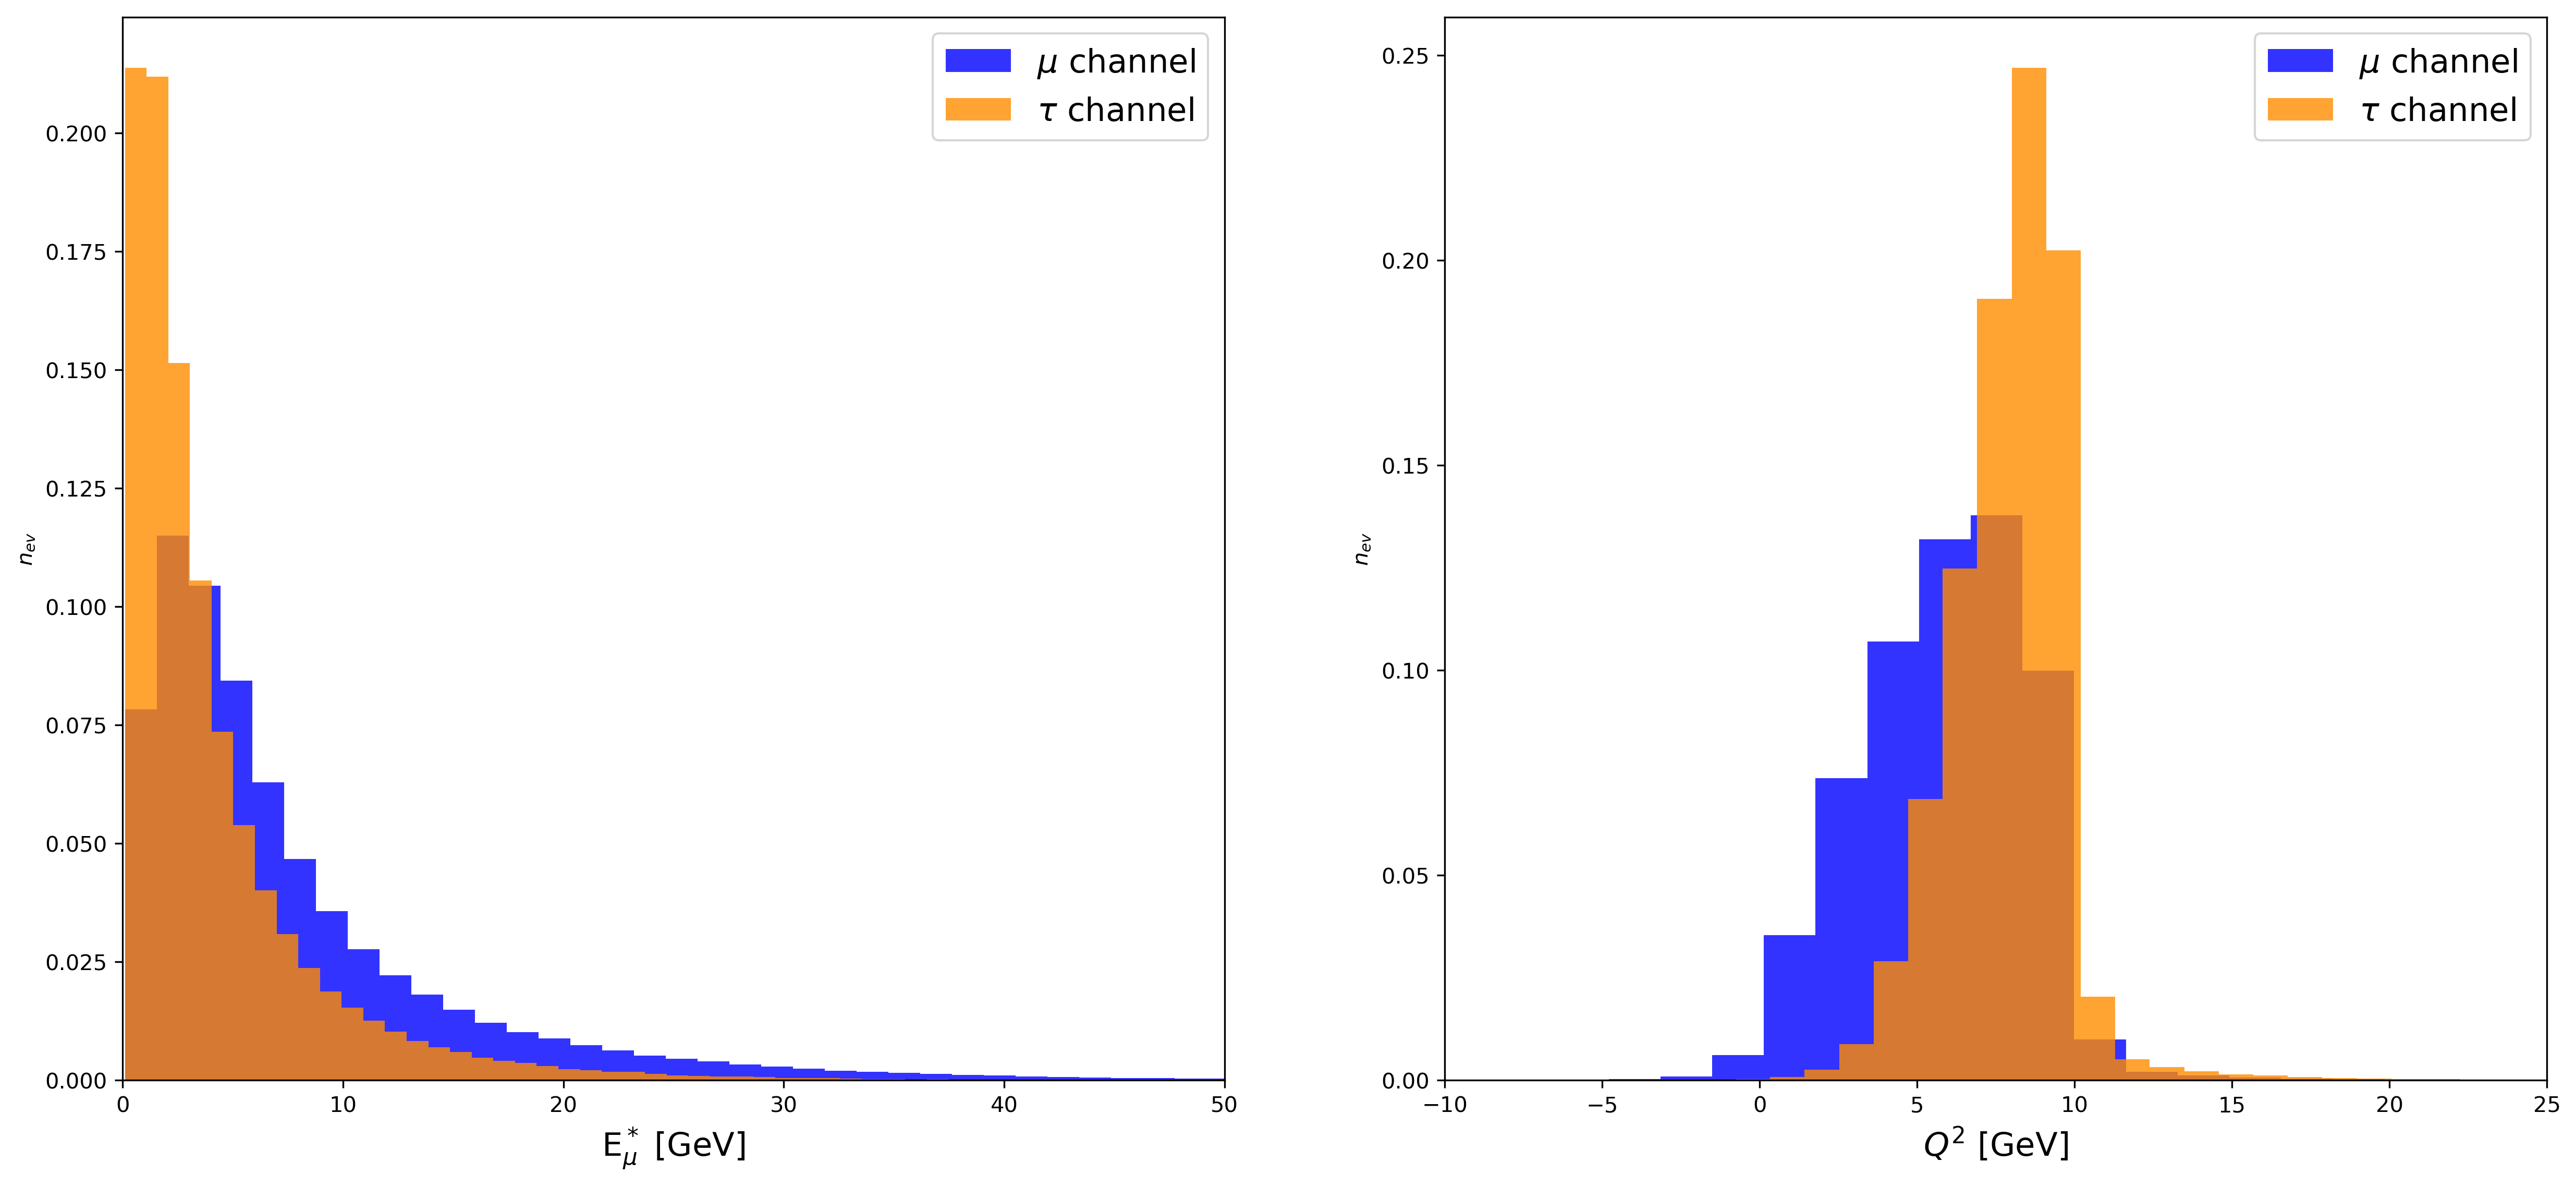

In [3]:
#######
# SGN #
##################
# PLOT E* AND Q2 #
##################


fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['muE_Brf'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['muE_Brf'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel('E$^*_{\mu}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,50])
ax = fig.add_subplot(122)
plt.hist(mu_events['q2'], bins=600, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['q2'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel('$Q^2$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-10,25])

(-10, 20)

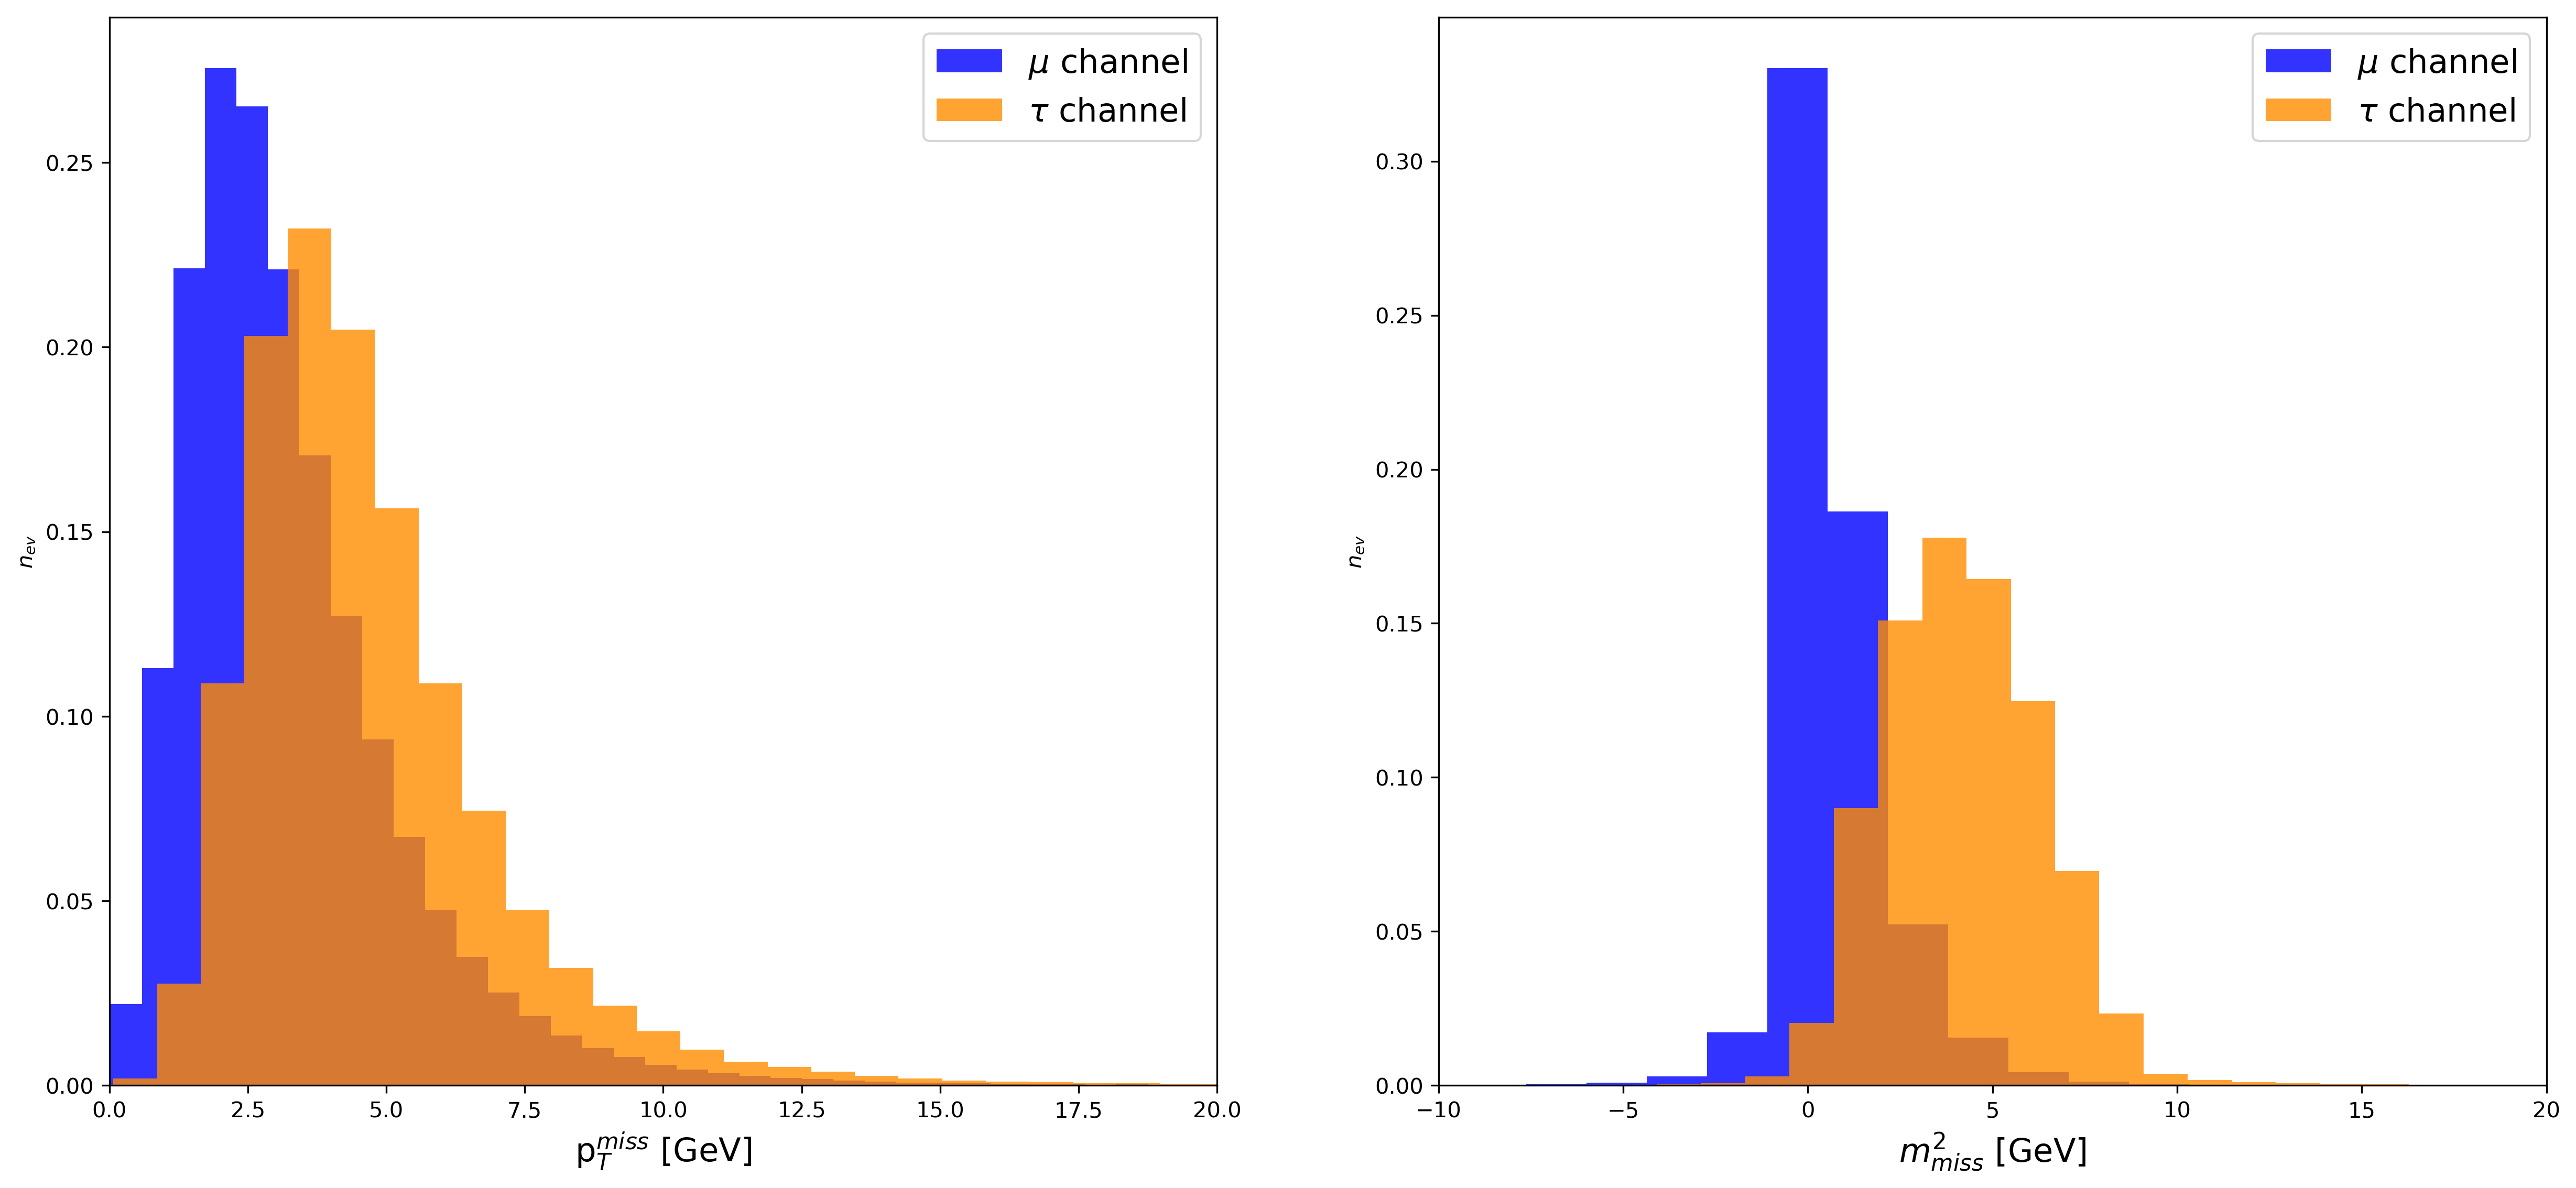

In [4]:
#######
# SGN #
##########################
# PLOT pTmiss AND Mmiss2 #
##########################

fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['pT_miss'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['pT_miss'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel('p$_T^{miss}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,20])
ax = fig.add_subplot(122)
plt.hist(mu_events['m2_miss'], bins=800, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['m2_miss'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel('$m^2_{miss}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-10,20])

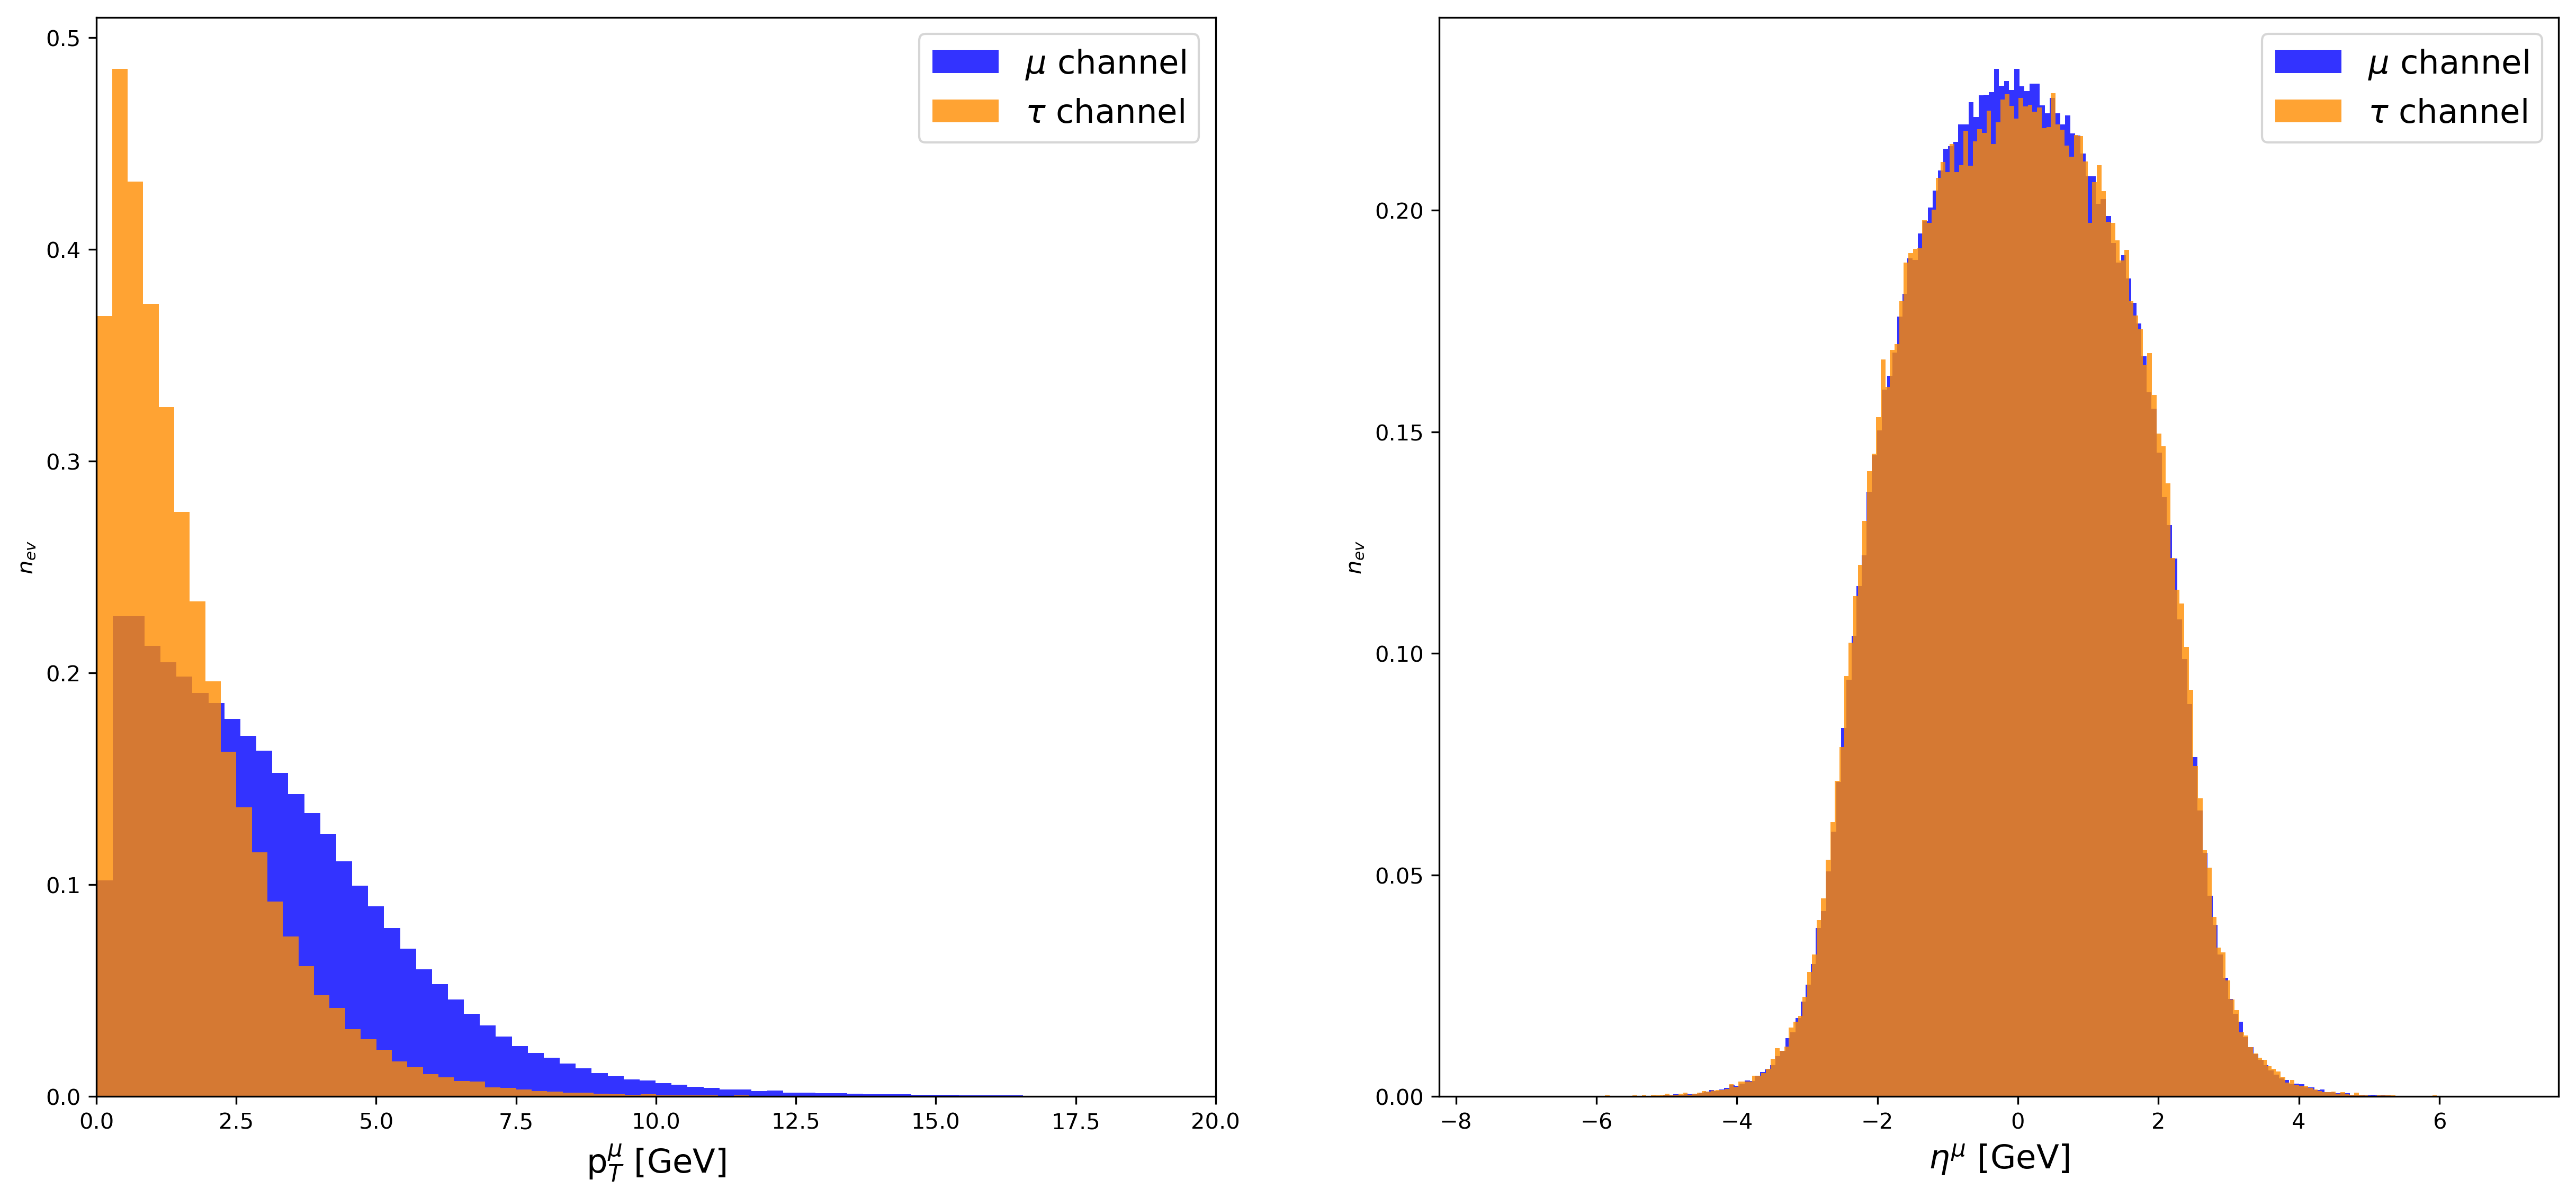

In [5]:
#######
# SGN #
#########################
# PLOT pT_mu AND eta_mu #
#########################


fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['mu_pt'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['mu_pt'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel(r'p$_T^{\mu}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,20])
ax = fig.add_subplot(122)
plt.hist(mu_events['mu_eta'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['mu_eta'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel('$\eta^{\mu}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)

(-30, 10)

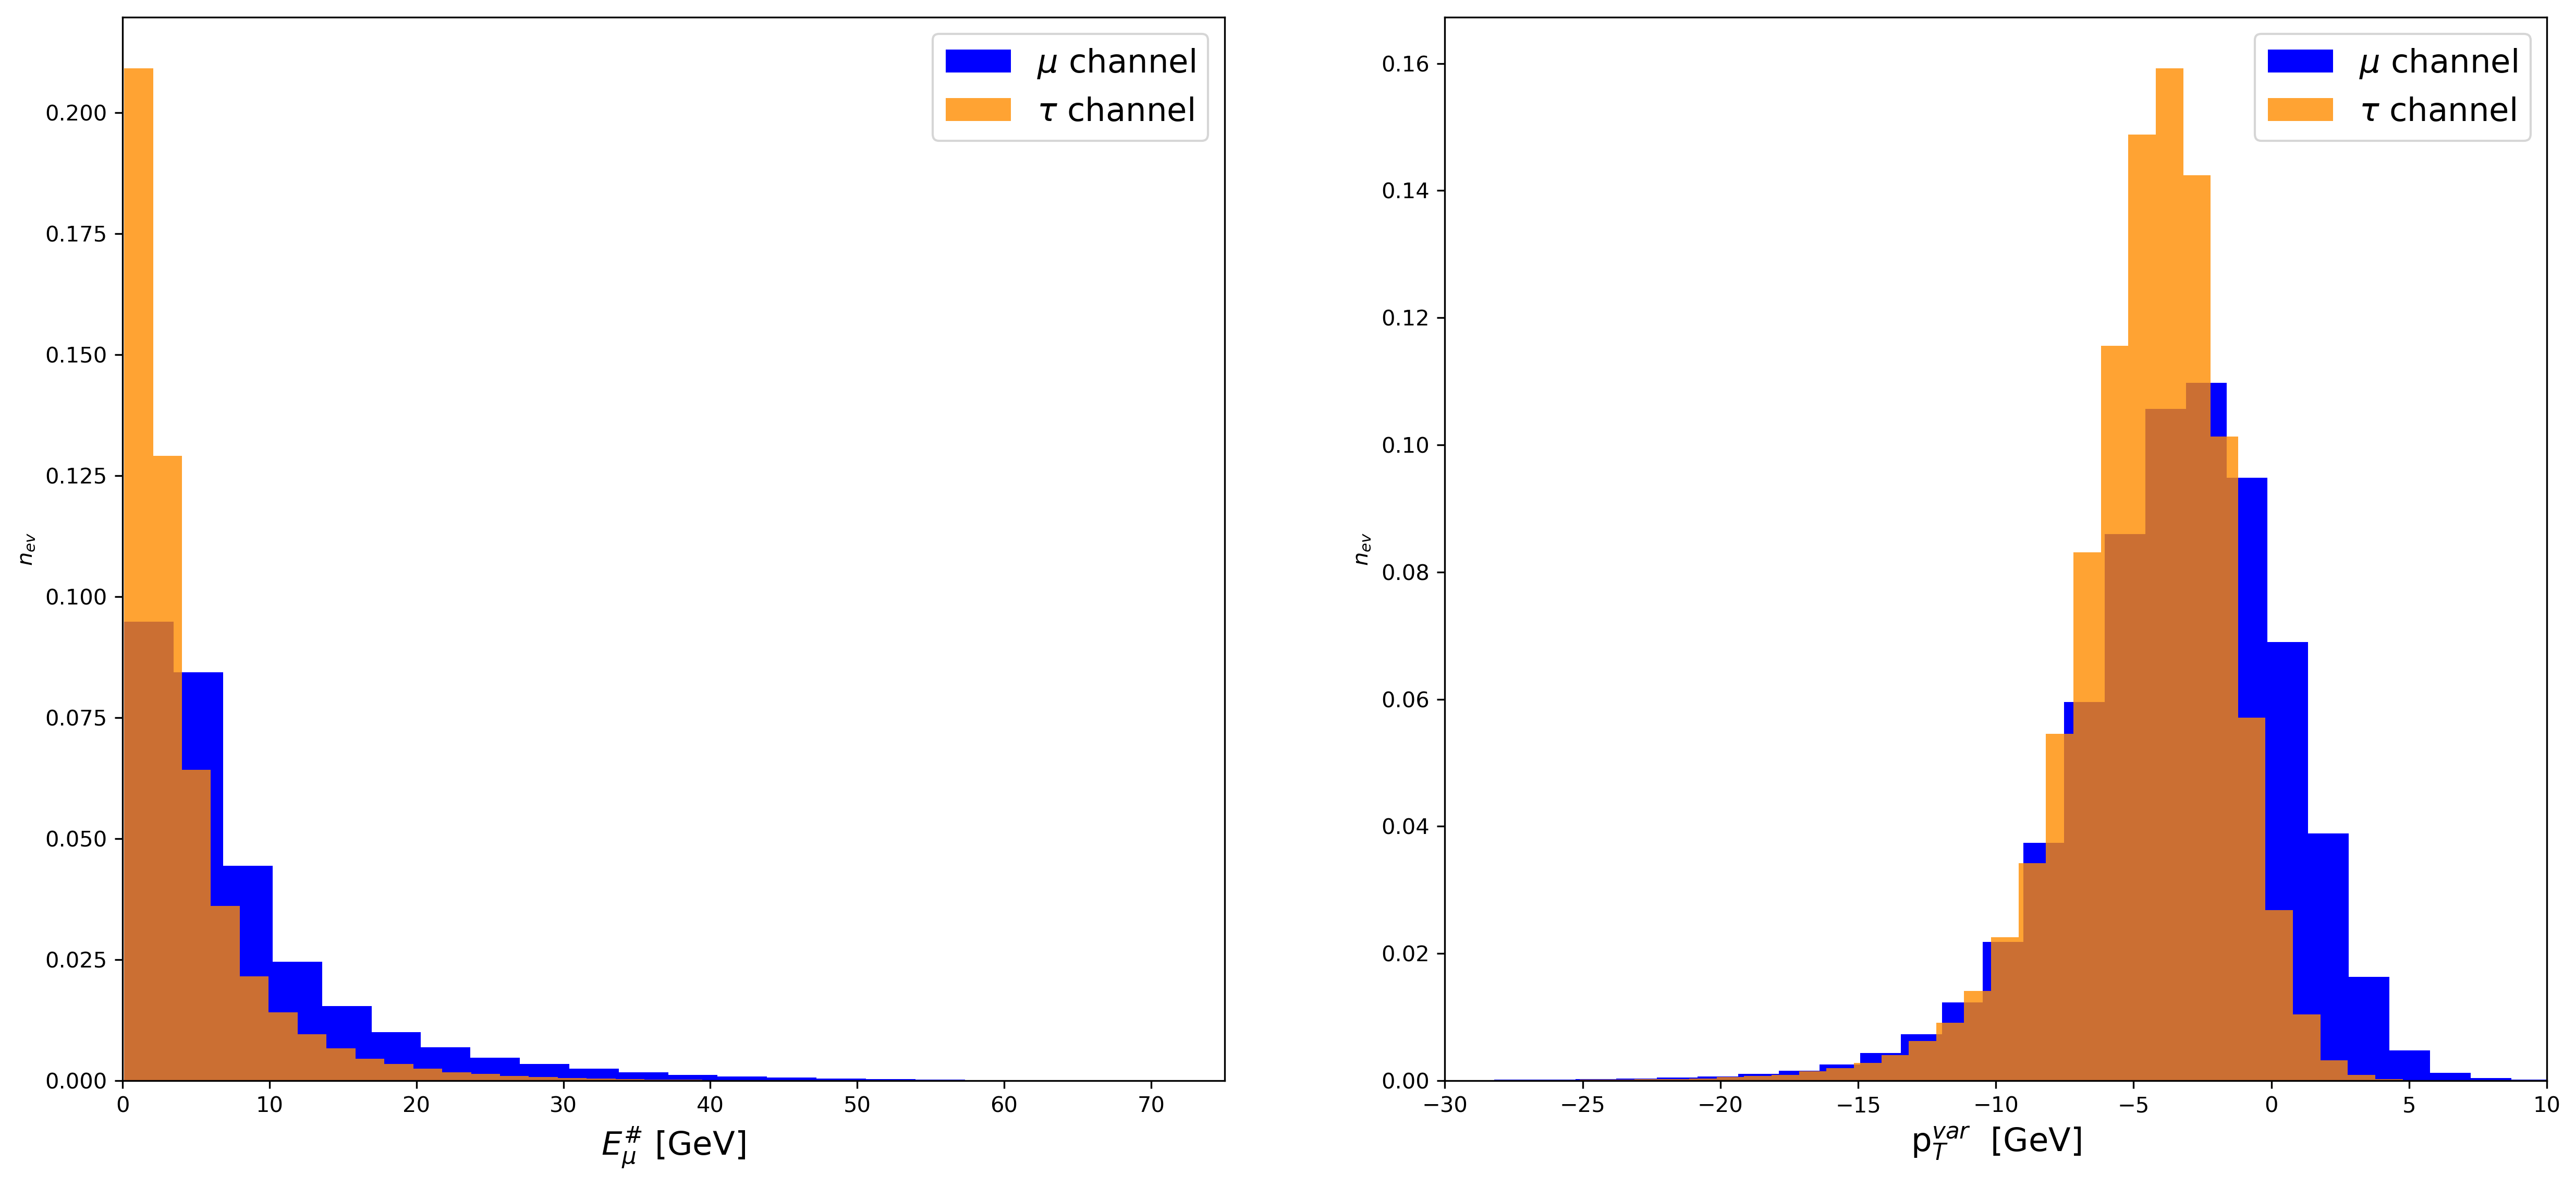

In [6]:
########
# SGN  #
#####################
# PLOT E# AND pTvar #
#####################

fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['muE_muSysRf'], bins=100, color='b', density=True, label=r'$\mu$ channel')
plt.hist(tau_events['muE_muSysRf'], bins=100, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel(r'$E^\#_{\mu}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,75])
ax = fig.add_subplot(122)
plt.hist(mu_events['pT_var'], bins=100, color='b', density=True, label=r'$\mu$ channel')
plt.hist(tau_events['pT_var'], bins=100, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel(r'p$_T^{var}$  [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-30,10])

(-1, 1)

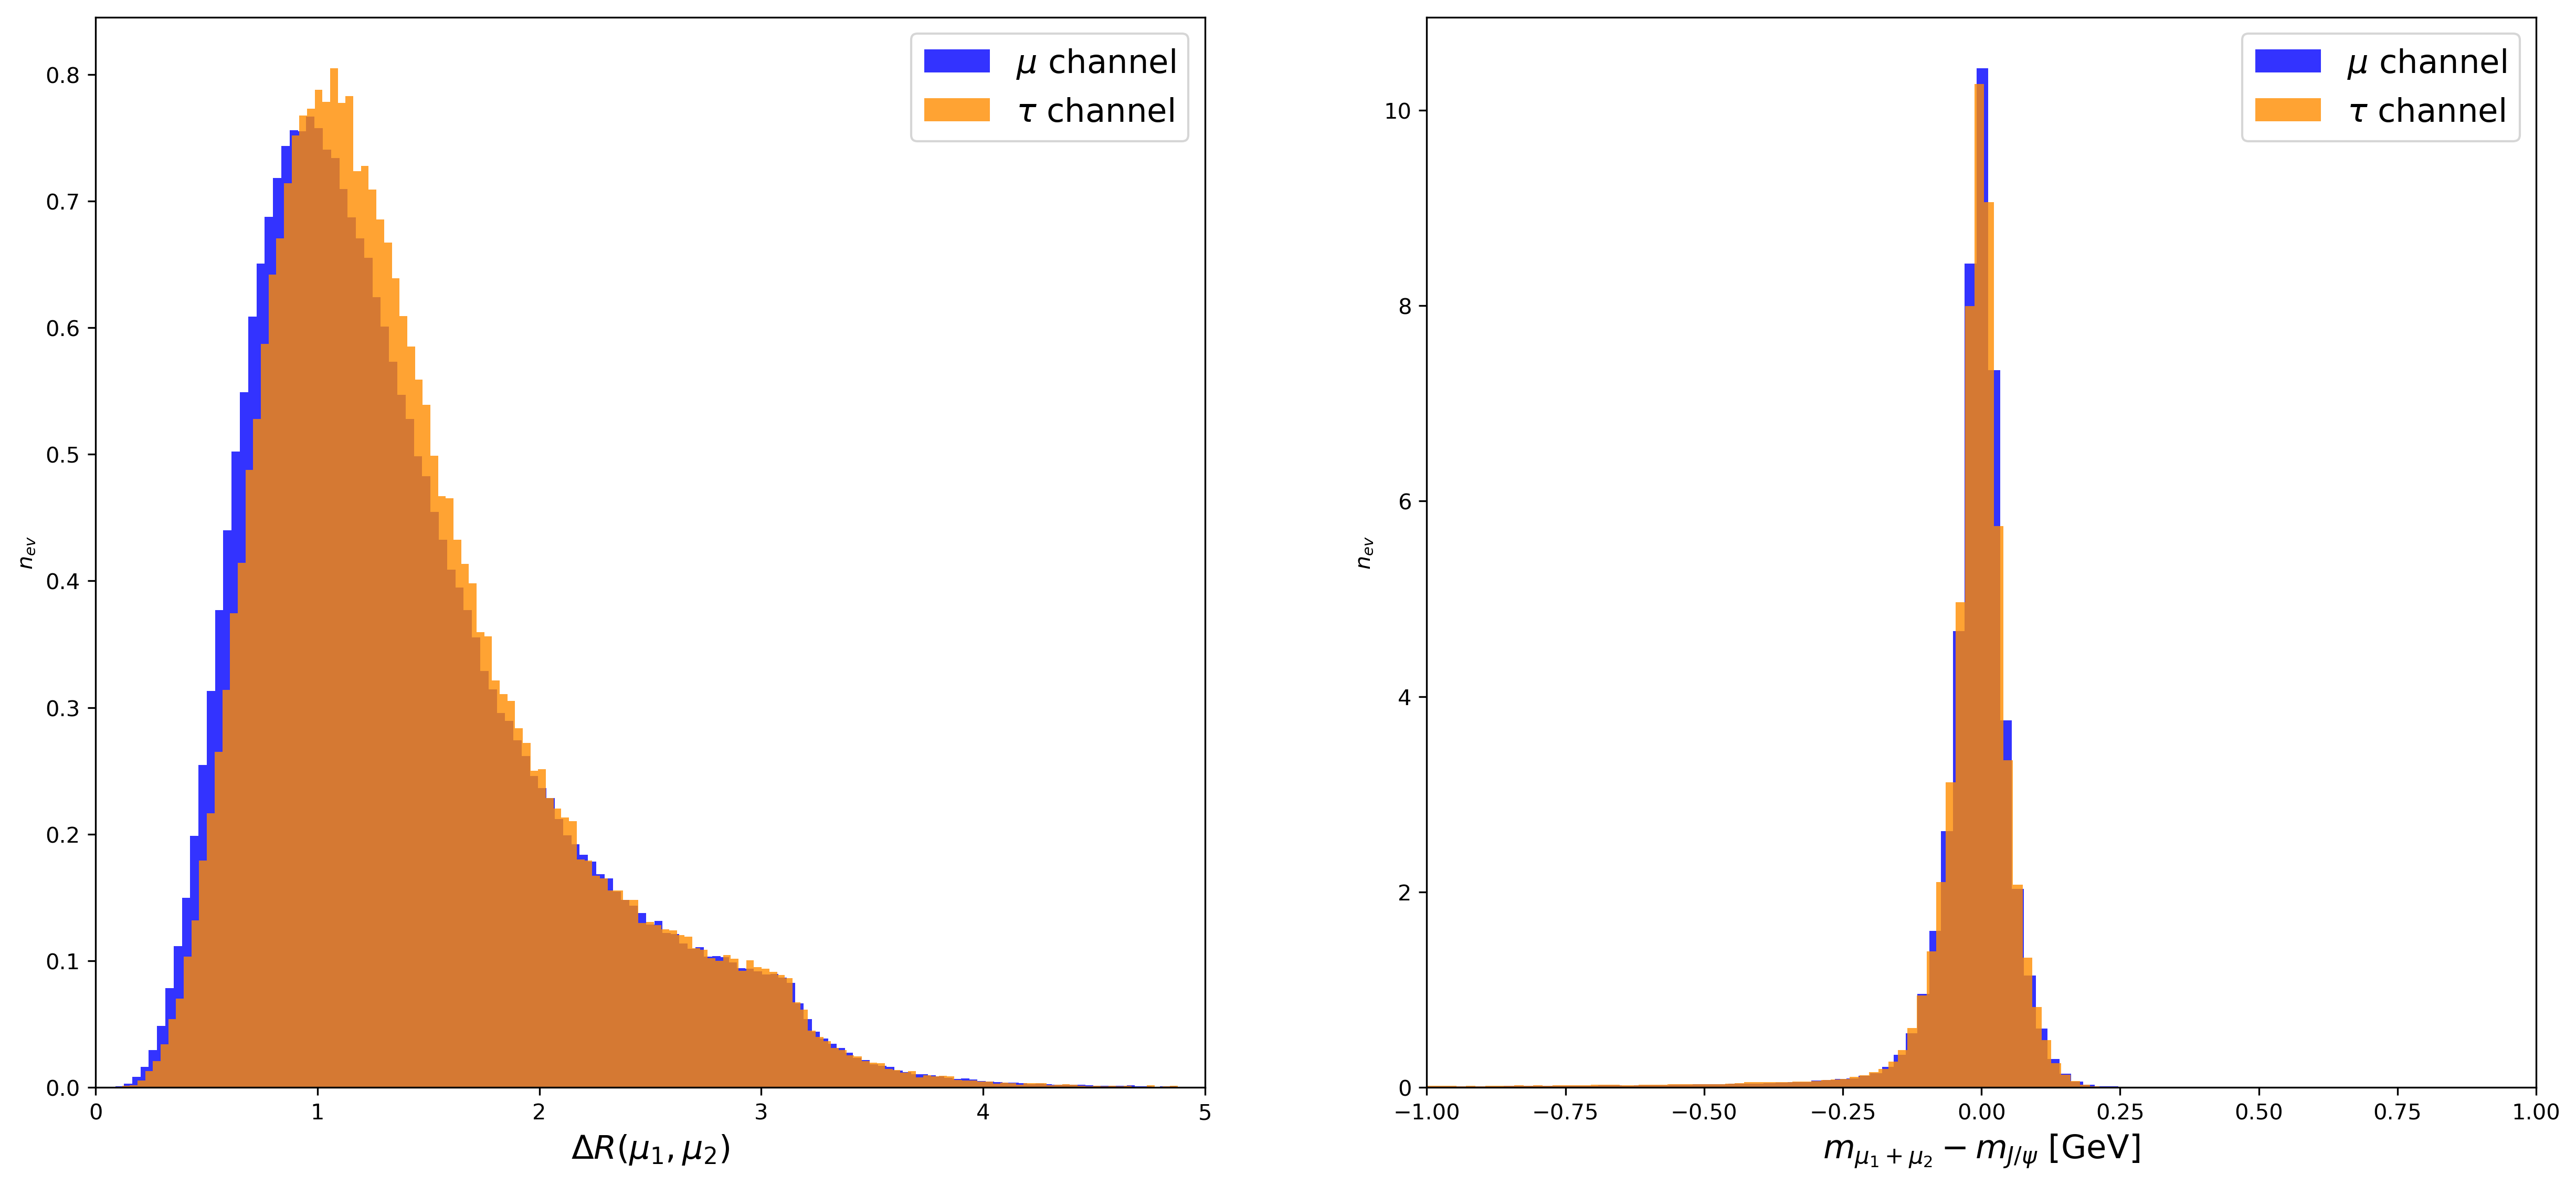

In [7]:
#######
# SGN #
#############################################
# PLOT deltaR_mu1mu2 AND jpsi_mass_diffReco #
#############################################


fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['deltaR_mu1mu2'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['deltaR_mu1mu2'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel(r'$\Delta R(\mu_1,\mu_2)$', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,5])
ax = fig.add_subplot(122)
plt.hist(mu_events['jpsi_mass_diffReco'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['jpsi_mass_diffReco'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel(r'$m_{\mu_1+\mu_2} - m_{J/\psi}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-0.75,0.30])

(-30, 15)

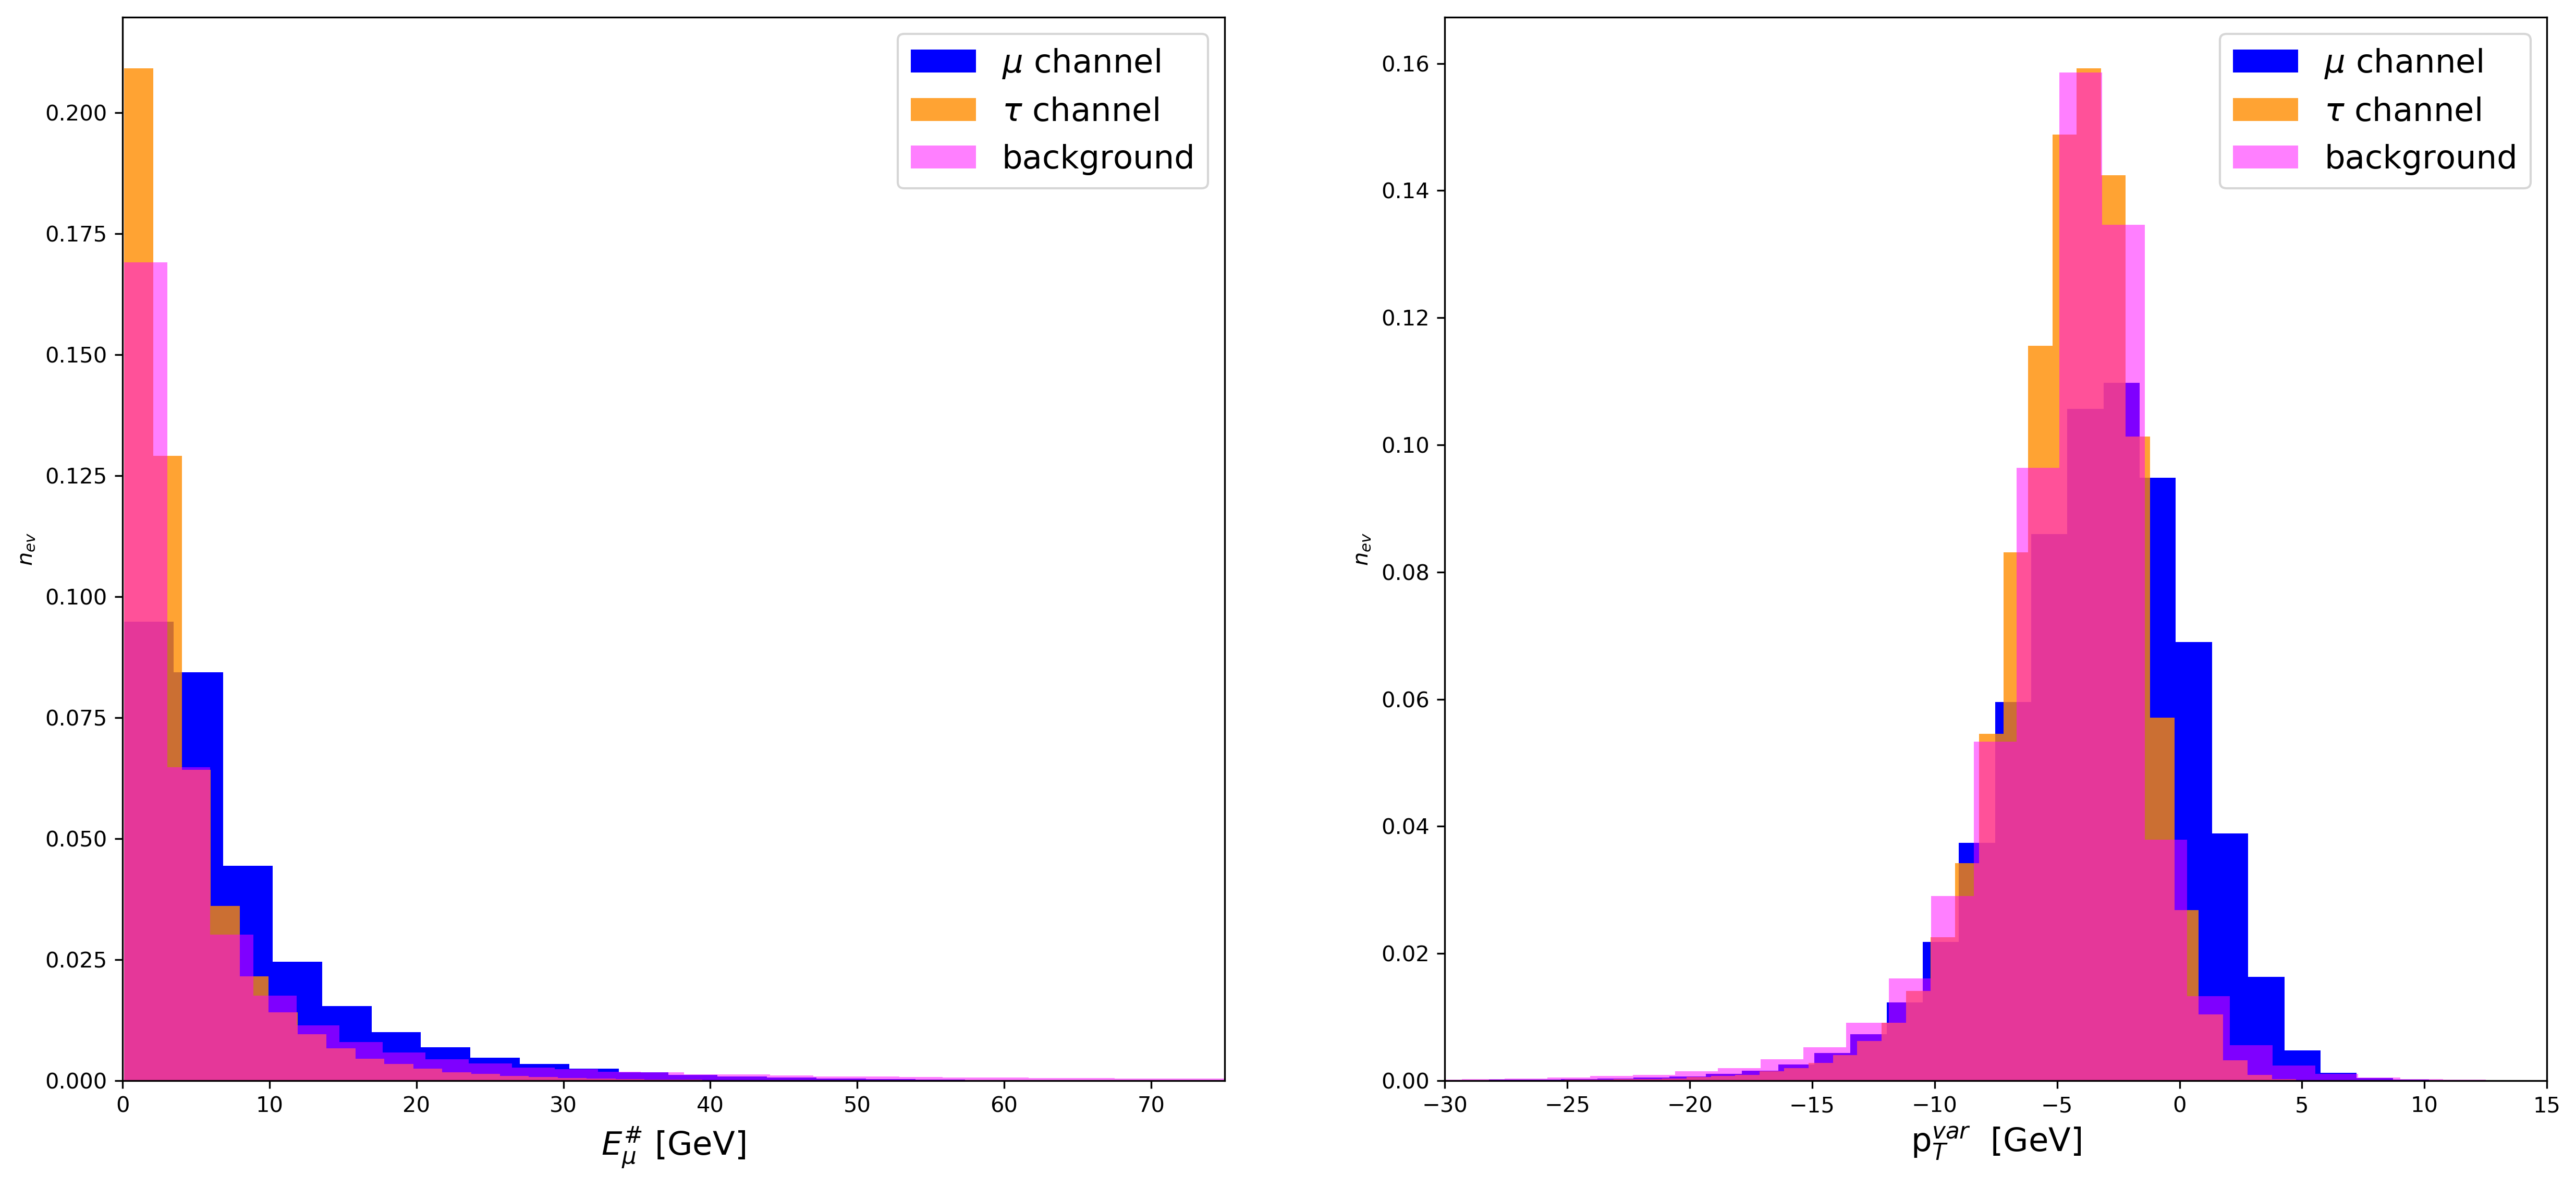

In [8]:
#############
# SGN - BKG #
#####################
# PLOT E# AND pTvar #
#####################

fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['muE_muSysRf'], bins=100, color='b', density=True, label=r'$\mu$ channel')
plt.hist(tau_events['muE_muSysRf'], bins=100, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
plt.hist(bkg_events['muE_muSysRf'], bins=15000, color='fuchsia', alpha=0.5, density=True, label='background')
ax.set_xlabel(r'$E^\#_{\mu}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,75])
ax = fig.add_subplot(122)
plt.hist(mu_events['pT_var'], bins=100, color='b', density=True, label=r'$\mu$ channel')
plt.hist(tau_events['pT_var'], bins=100, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
plt.hist(bkg_events['pT_var'], bins=100, color='fuchsia', alpha=0.5, density=True, label='background')
ax.set_xlabel(r'p$_T^{var}$  [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-30,15])

(-6, 6)

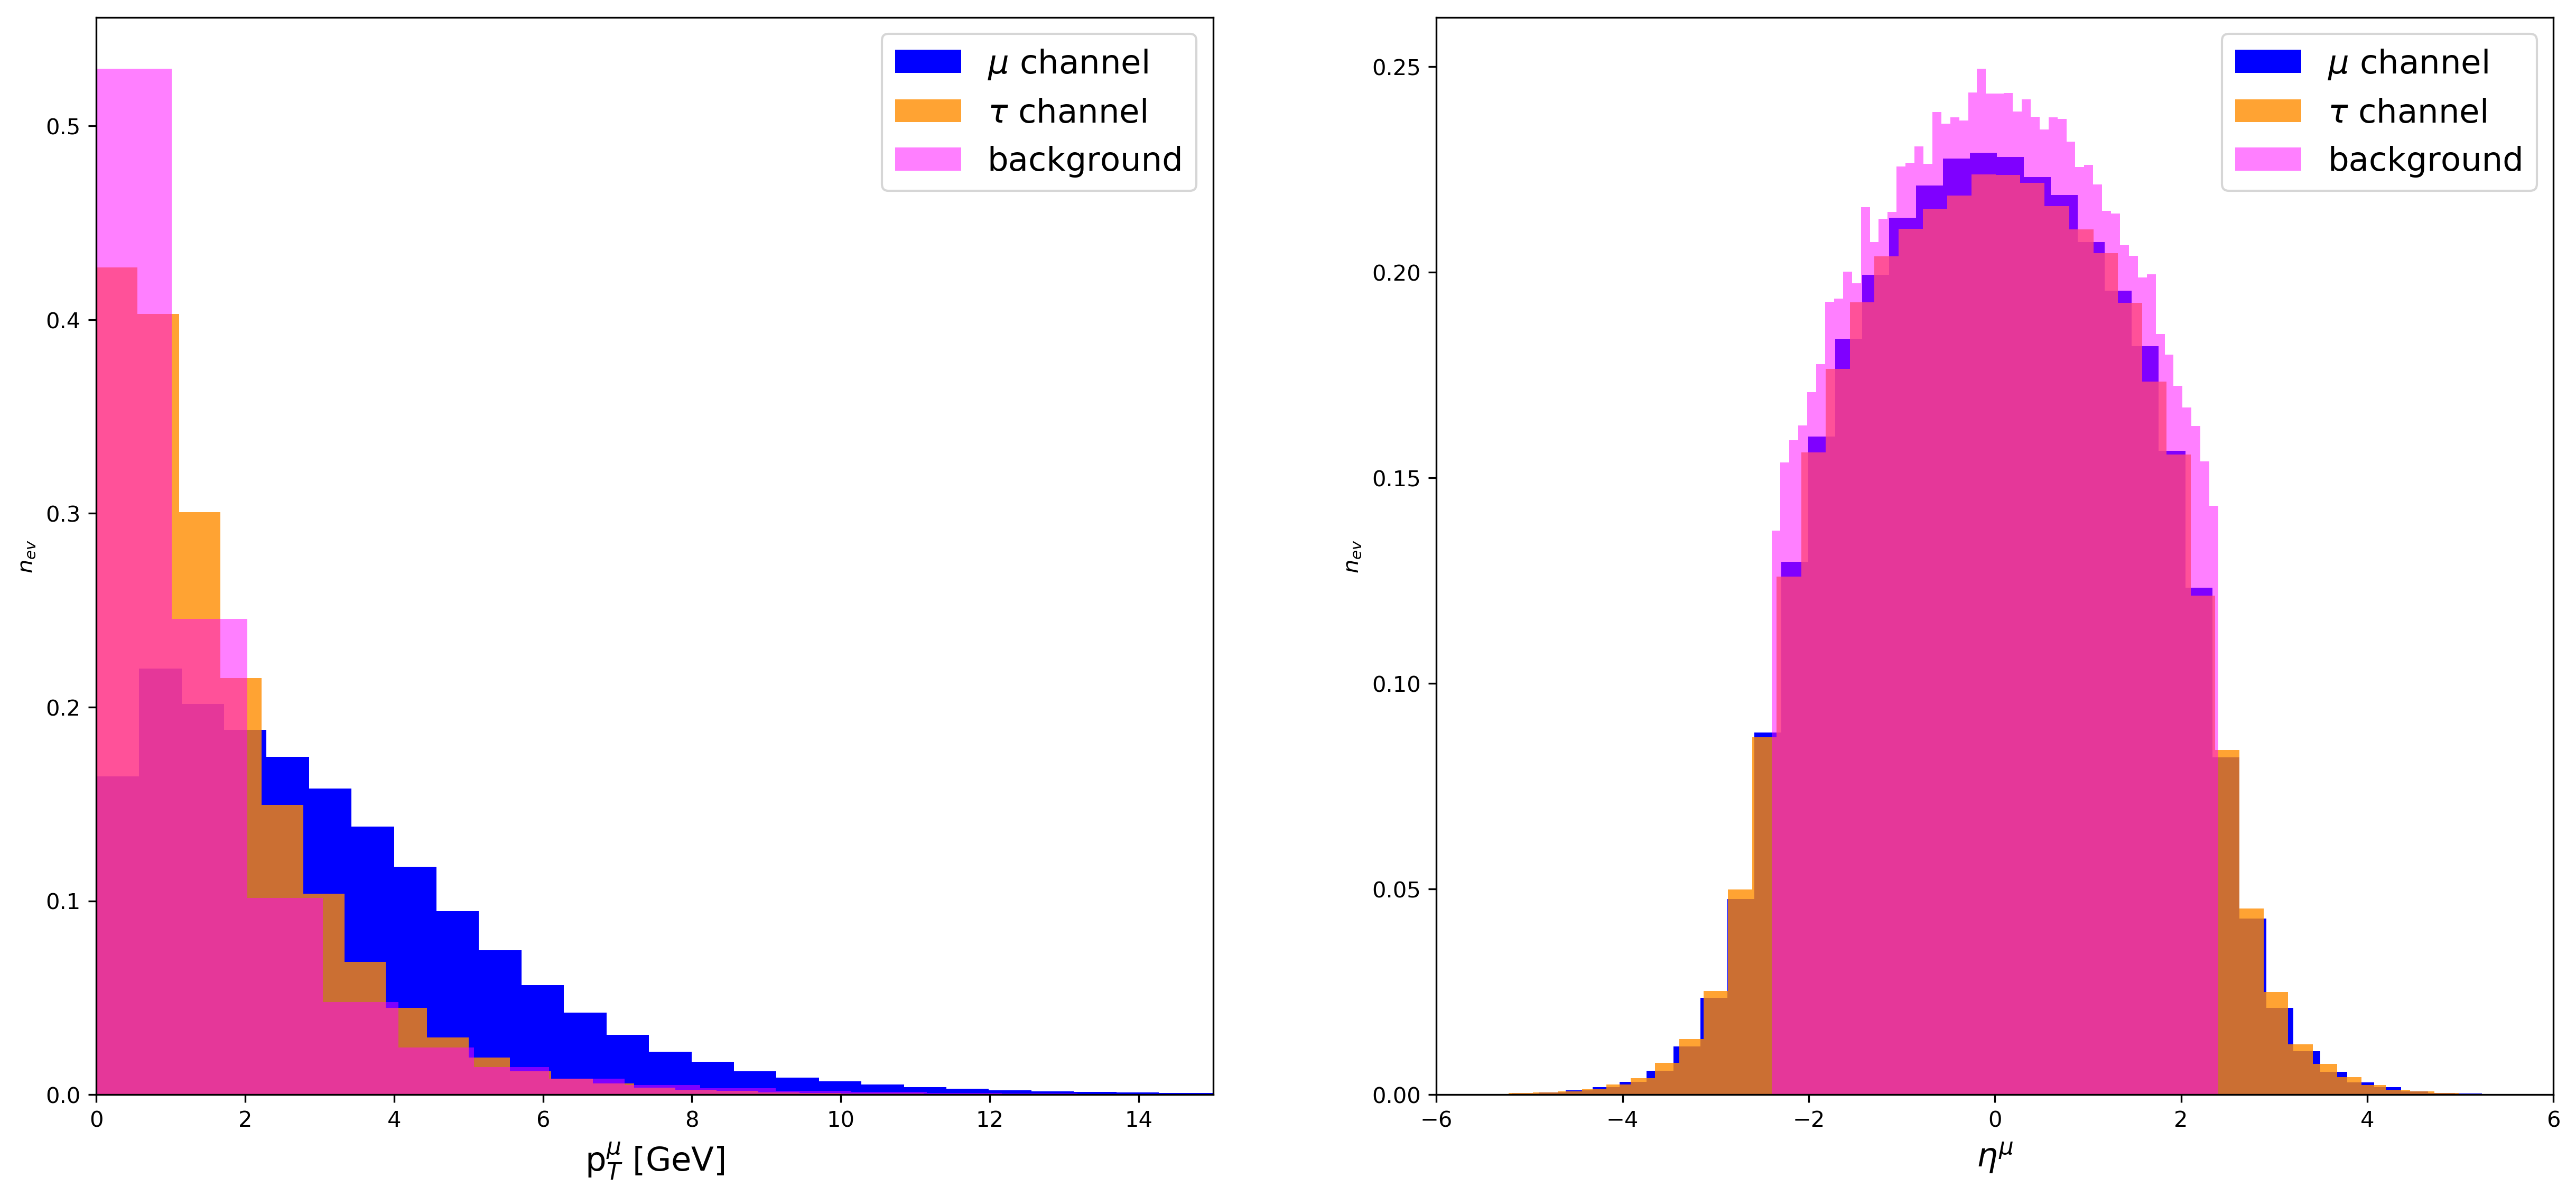

In [9]:
#############
# SGN - BKG #
#########################
# PLOT pT_mu AND eta_mu #
#########################

fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['mu_pt'], bins=100, color='b', density=True, label=r'$\mu$ channel')
plt.hist(tau_events['mu_pt'], bins=100, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
plt.hist(bkg_events['mu_pt'], bins=150, color='fuchsia', alpha=0.5, density=True, label='background')
ax.set_xlabel(r'p$_T^\mu$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,15])
ax = fig.add_subplot(122)
plt.hist(mu_events['mu_eta'], bins=50, color='b', density=True, label=r'$\mu$ channel')
plt.hist(tau_events['mu_eta'], bins=50, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
plt.hist(bkg_events['mu_eta'], bins=50, color='fuchsia', alpha=0.5, density=True, label='background')
ax.set_xlabel(r'$\eta^{\mu}$', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-6,6])

(-1, 1)

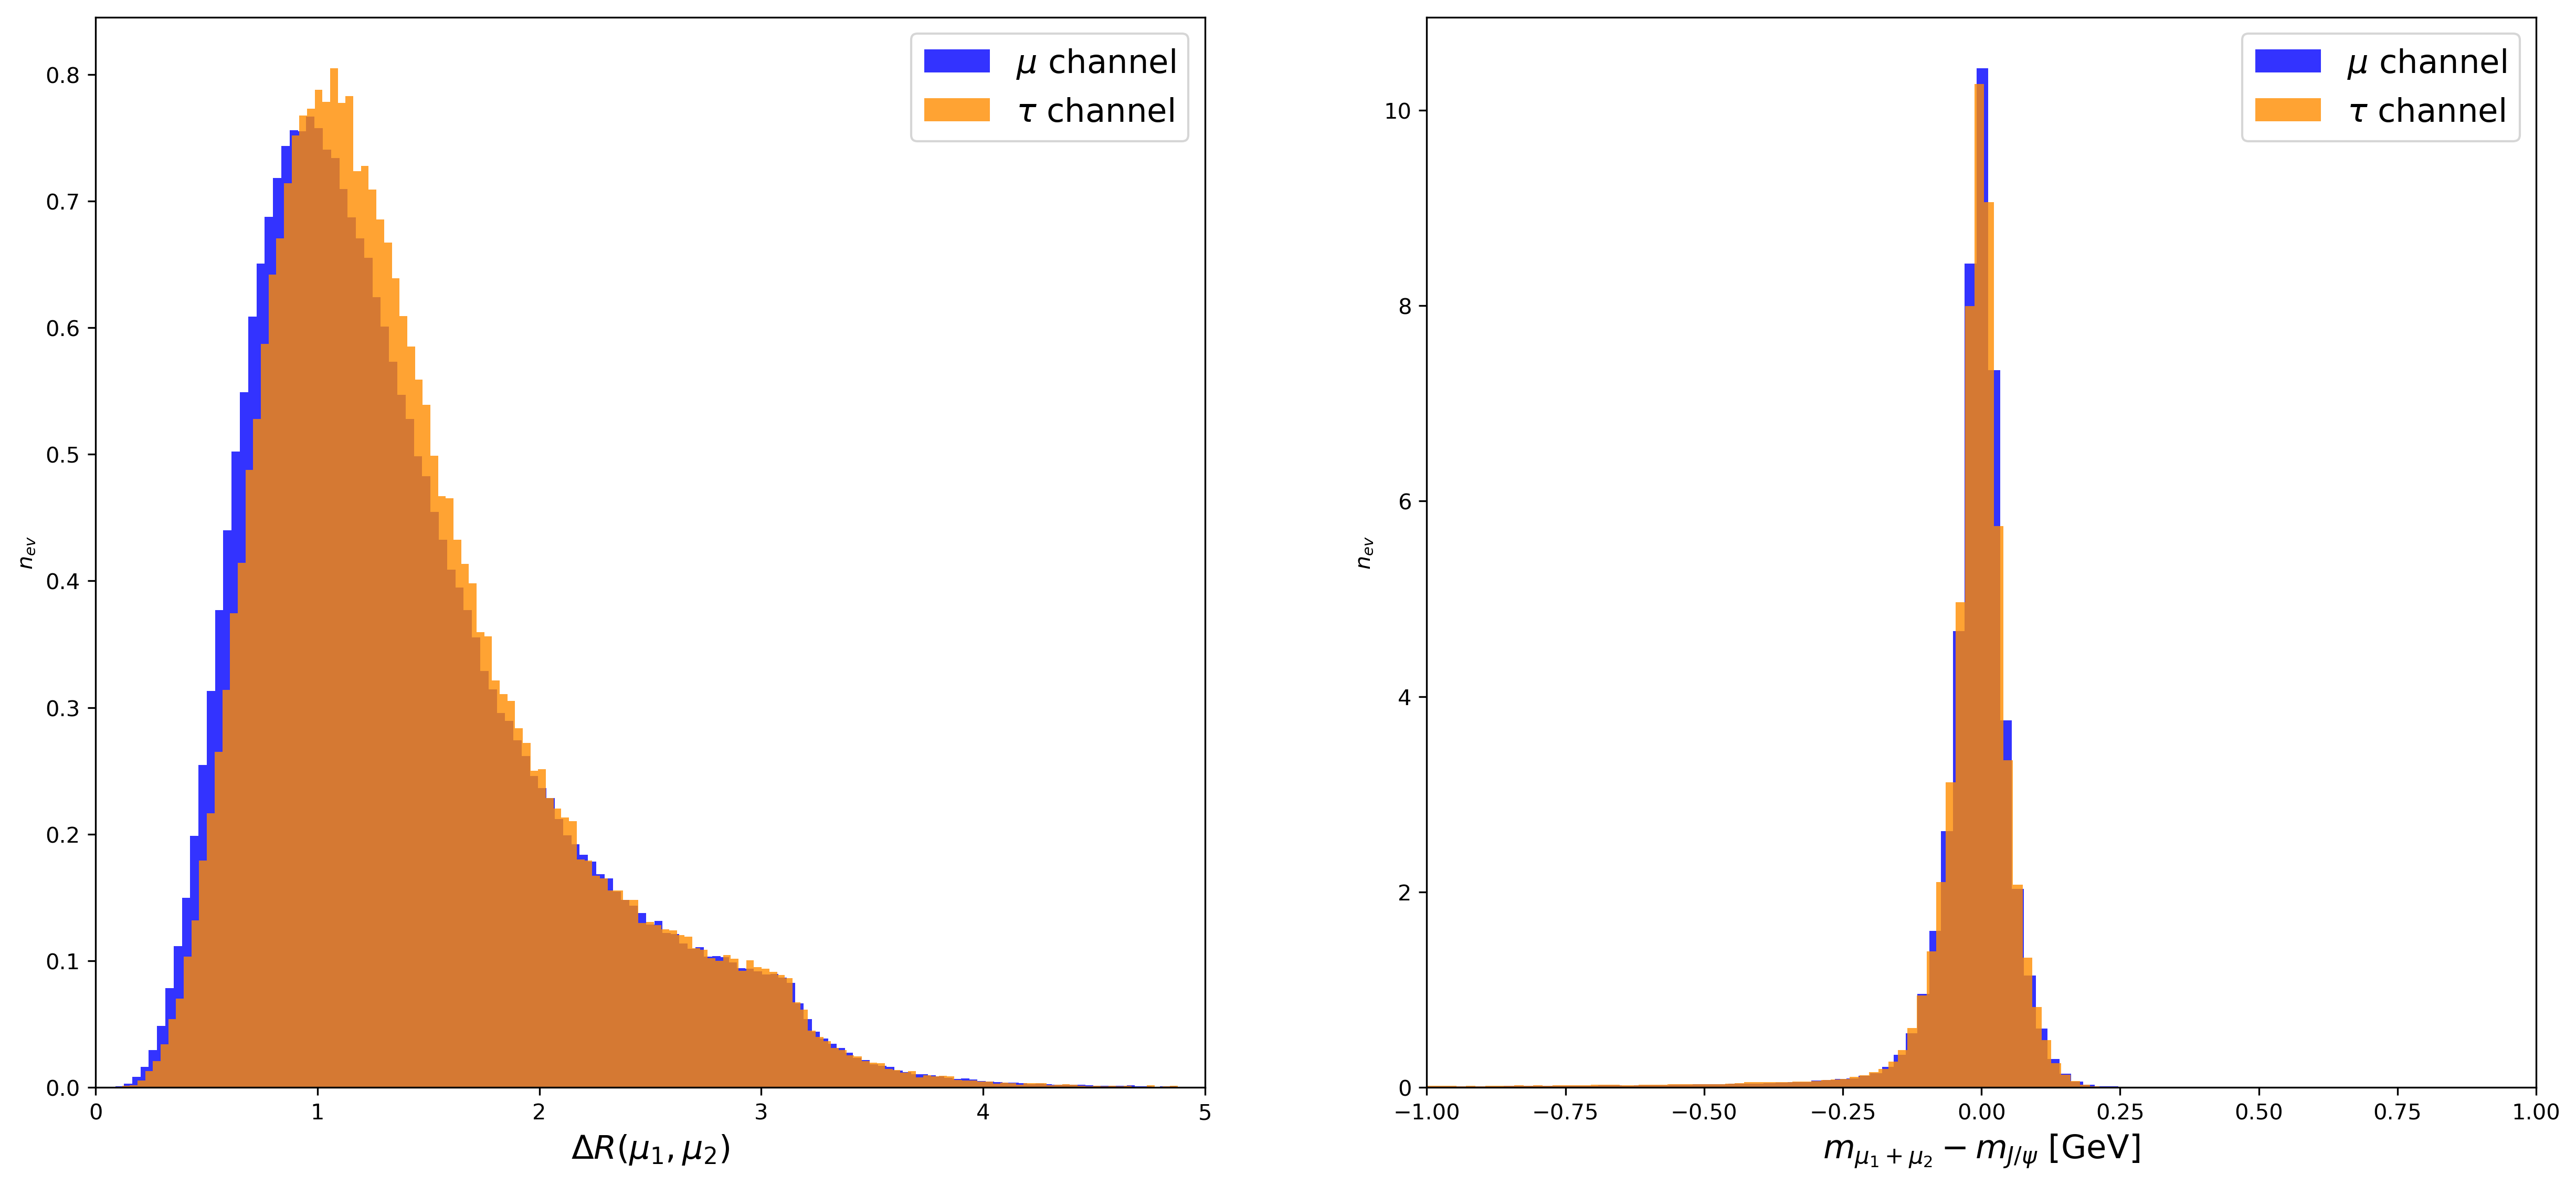

In [10]:
#############
# SGN - BKG #
#############################################
# PLOT deltaR_mu1mu2 AND jpsi_mass_diffReco #
#############################################


fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu_events['deltaR_mu1mu2'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['deltaR_mu1mu2'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel(r'$\Delta R(\mu_1,\mu_2)$', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([0,5])
ax = fig.add_subplot(122)
plt.hist(mu_events['jpsi_mass_diffReco'], bins=200, color='b', alpha=0.8, density=True, label=r'$\mu$ channel')
plt.hist(tau_events['jpsi_mass_diffReco'], bins=200, color='darkorange', alpha=0.8, density=True, label=r'$\tau$ channel')
ax.set_xlabel('$m_{\mu_1+\mu_2} - m_{J/\psi}$ [GeV]', fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-1,1])

(0, 0.0025)

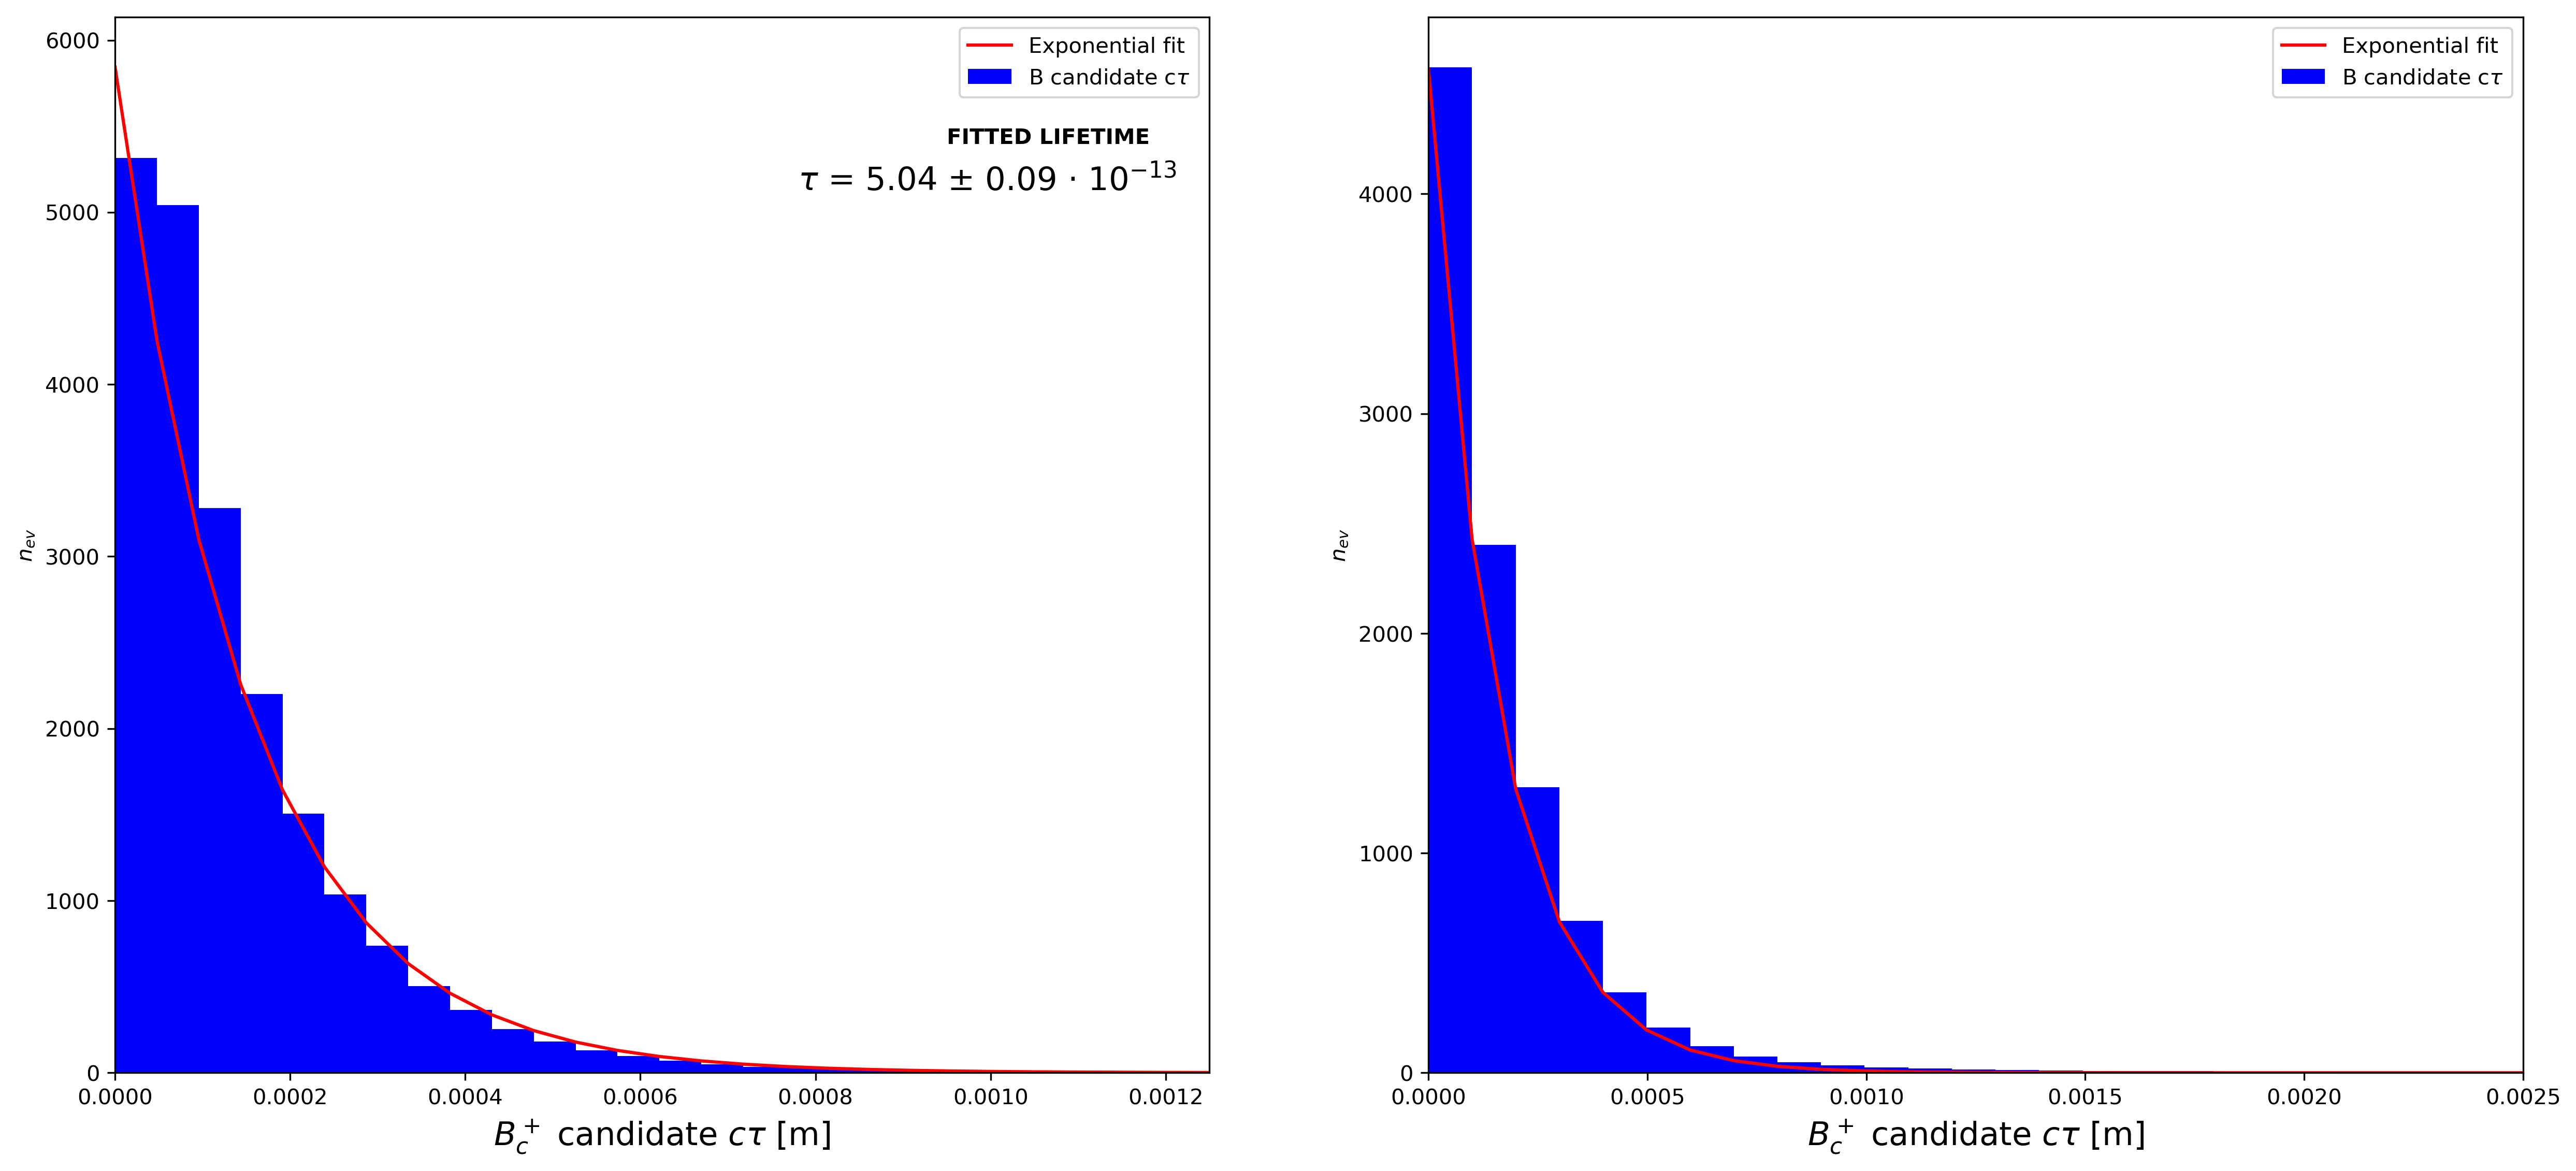

In [23]:
##########
# B RECO #
################
# LIFETIME FIT #
################

c = 2.99e8 #m/s
from scipy import optimize
from pylab import exp
def Exp(x,a,norm):
    return norm * exp(-a*x)

bins = 200
fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
binned_data,bins_edges,patches = plt.hist(mu['bcT_CT'], bins=bins, density=True, color='b', label=r'B candidate c$\tau$')
ax.set_xlabel(r'$B^+_c$ candidate $c\tau$ [m]',fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
x_eval = np.delete(bins_edges,bins-1)
popt, popv = optimize.curve_fit(Exp,x_eval,binned_data)
ax.plot(x_eval,Exp(x_eval,popt[0],popt[1]),'r',label='Exponential fit')
ax.legend()
plt.xlim([0,0.00125])
# write on the plot the fitted value of the lifetime
ax.text(0.00095, 5400, r'FITTED LIFETIME',size=10, fontweight='bold')
ax.text(0.00078, 5130, r'$\tau$ = 5.04 $\pm$ 0.09 $\cdot$ $10^{-13}$',size=15)
ax = fig.add_subplot(122)
temp = mu[mu['bcZ_CT']<0.1]
binned_data,bins_edges,patches = plt.hist(temp['bcZ_CT'], bins=1000, density=True, color='b', label=r'B candidate c$\tau$')
ax.set_xlabel(r'$B^+_c$ candidate $c\tau$ [m]',fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
x_eval = np.delete(bins_edges,bins-1)
popt, popv = optimize.curve_fit(Exp,x_eval,binned_data)
ax.plot(x_eval,Exp(x_eval,popt[0],popt[1]),'r',label='Exponential fit')
ax.legend()
plt.xlim([0,0.0025])
# write on the plot the fitted value of the lifetime
#ax.text(106, 1.42, r'FITTED LIFETIME',size=10, fontweight='bold')
#ax.text(78, 1.35, r'$\tau$ = 4.624 $\pm$ 0.007 $\cdot$ $10^{-11}$',size=15)

In [22]:
print 'fitted lifetime = ', 1/(popt[0]*c)
print 'fitted lifetime error = ', 1/((popt[0])**2*c)*np.sqrt(np.diag(popv)[0])

fitted lifetime =  5.279958200744749e-13
fitted lifetime error =  4.0319527209924647e-16


(-5, 30)

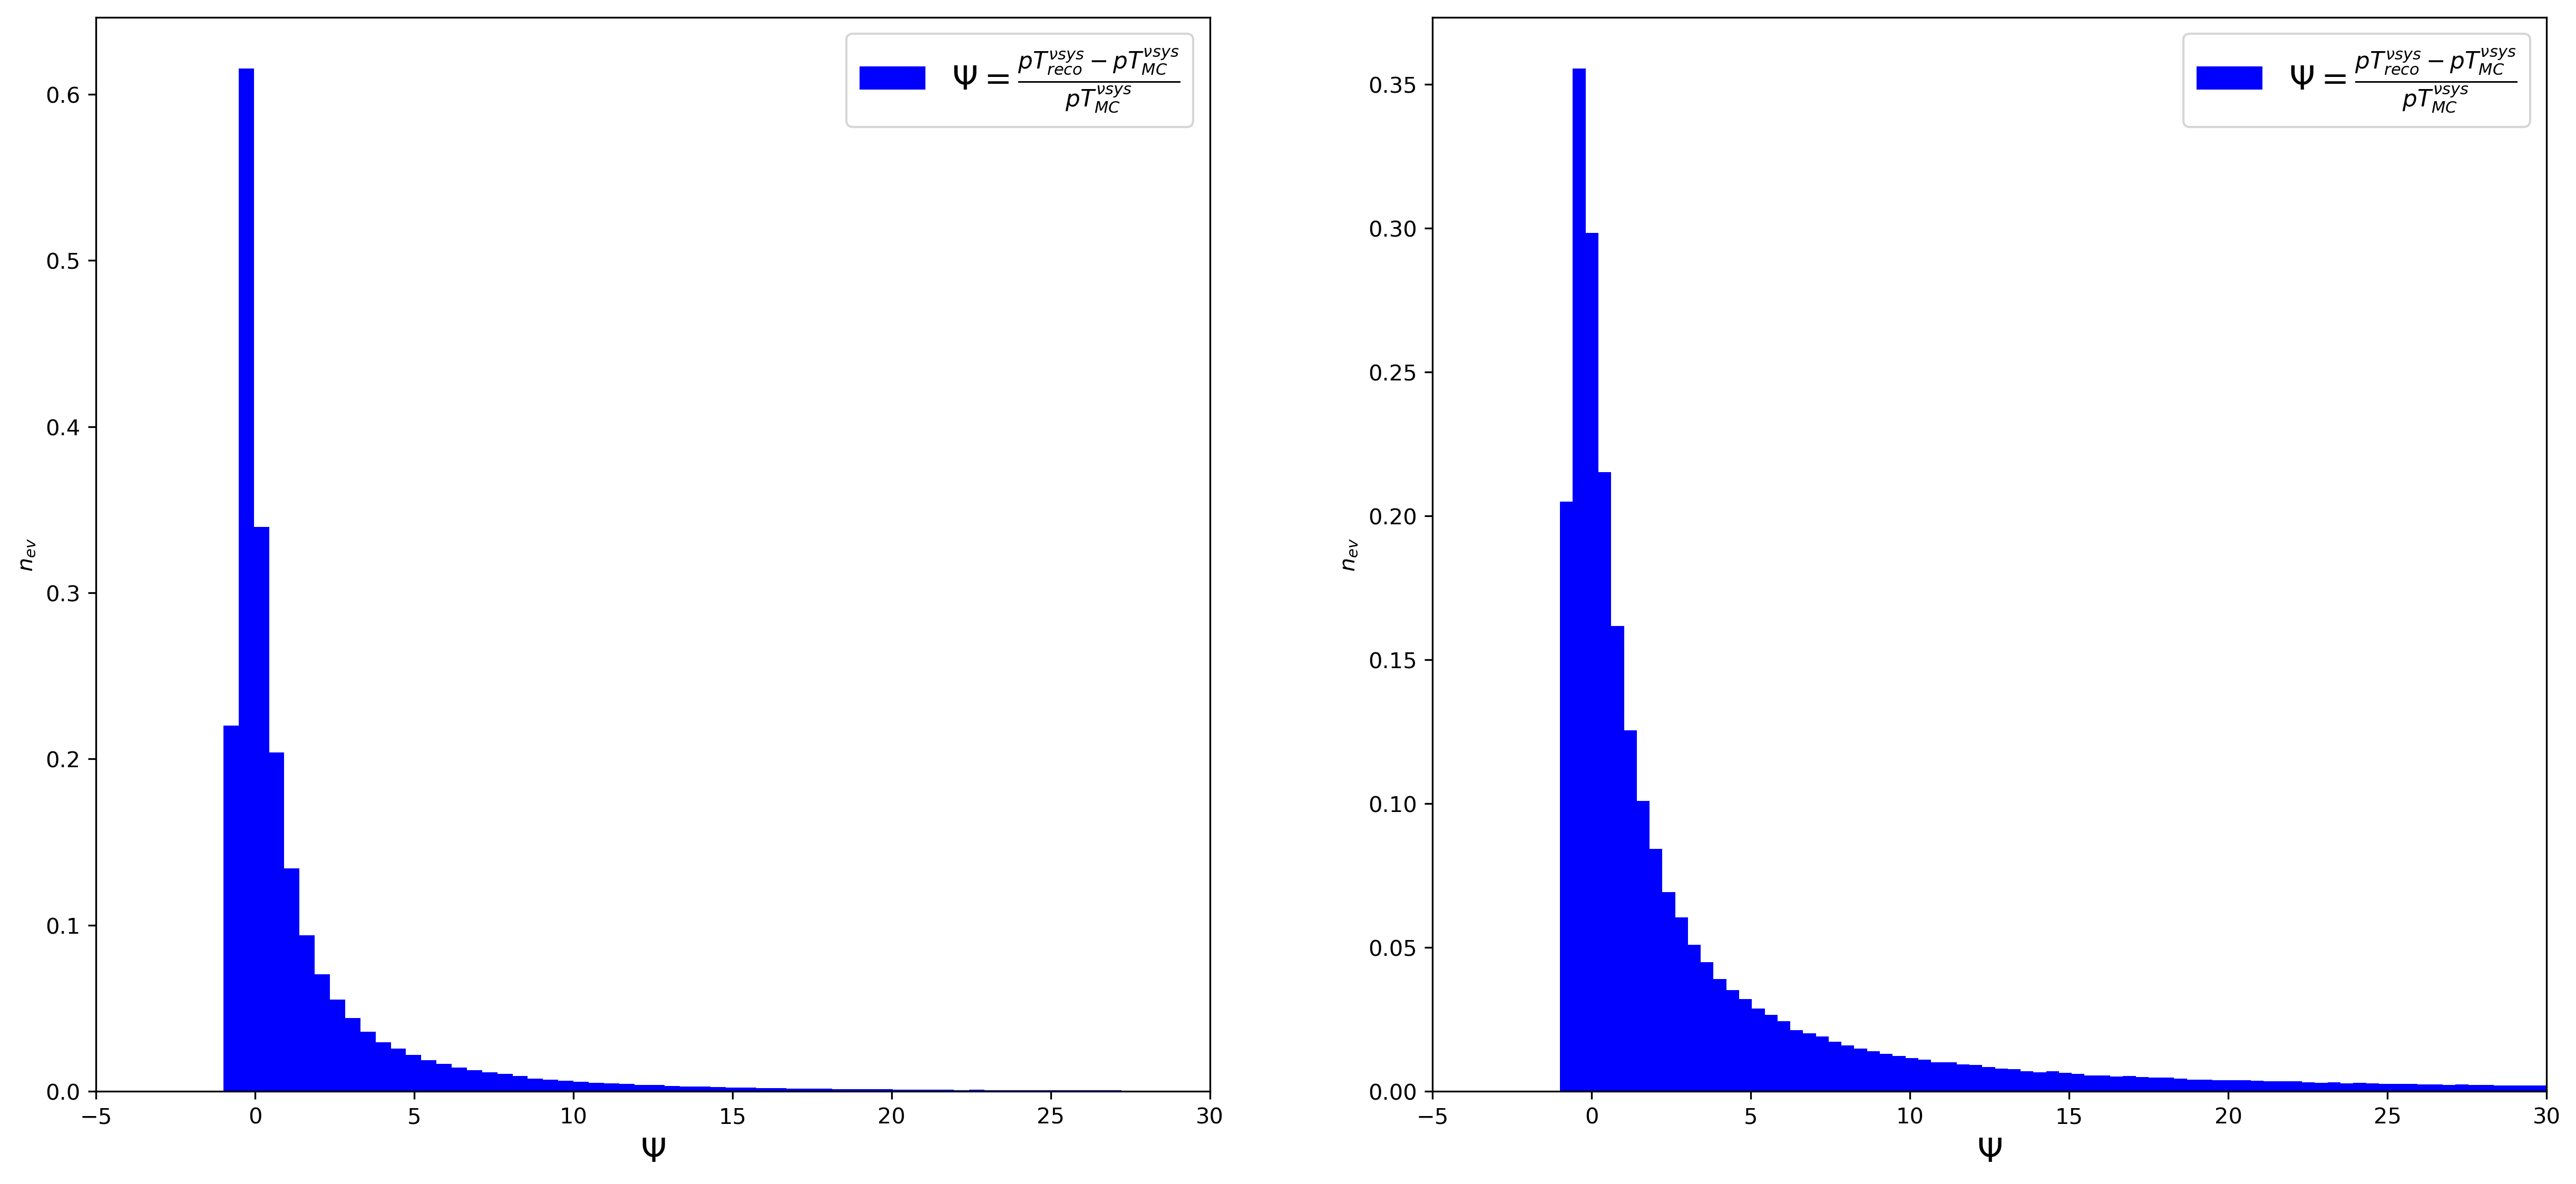

In [17]:
##########
# B RECO #
########################
# NEUTRINO SYSTEM RECO #
########################

fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
ax.hist((mu['nusysrecoT_pt']-mu['munu_pt'])/mu['munu_pt'], bins=5000, color='b', density=True, label=r'$\Psi = \frac{pT^{\nu sys}_{reco}-pT^{\nu sys}_{MC}}{pT^{\nu sys}_{MC}}$')
ax.set_xlabel(r'$\Psi$',fontsize=15)
plt.xlim([-7,100])
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-5,30])
ax = fig.add_subplot(122)
temp = mu[(mu['nusysrecoZ_pt'] - mu['munu_pt'])/mu['munu_pt'] < 200]
plt.hist((temp['nusysrecoZ_pt']-temp['munu_pt'])/temp['munu_pt'], bins=500, color='b', density=True, label=r'$\Psi = \frac{pT^{\nu sys}_{reco}-pT^{\nu sys}_{MC}}{pT^{\nu sys}_{MC}}$')
#ax.set_xlabel(r'$\frac{pT^{\nu sys}_{reco}-pT^{\nu sys}_{MC}}{pT^{\nu sys}_{MC}}$')
ax.set_xlabel(r'$\Psi$',fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
plt.xlim([-5,30])

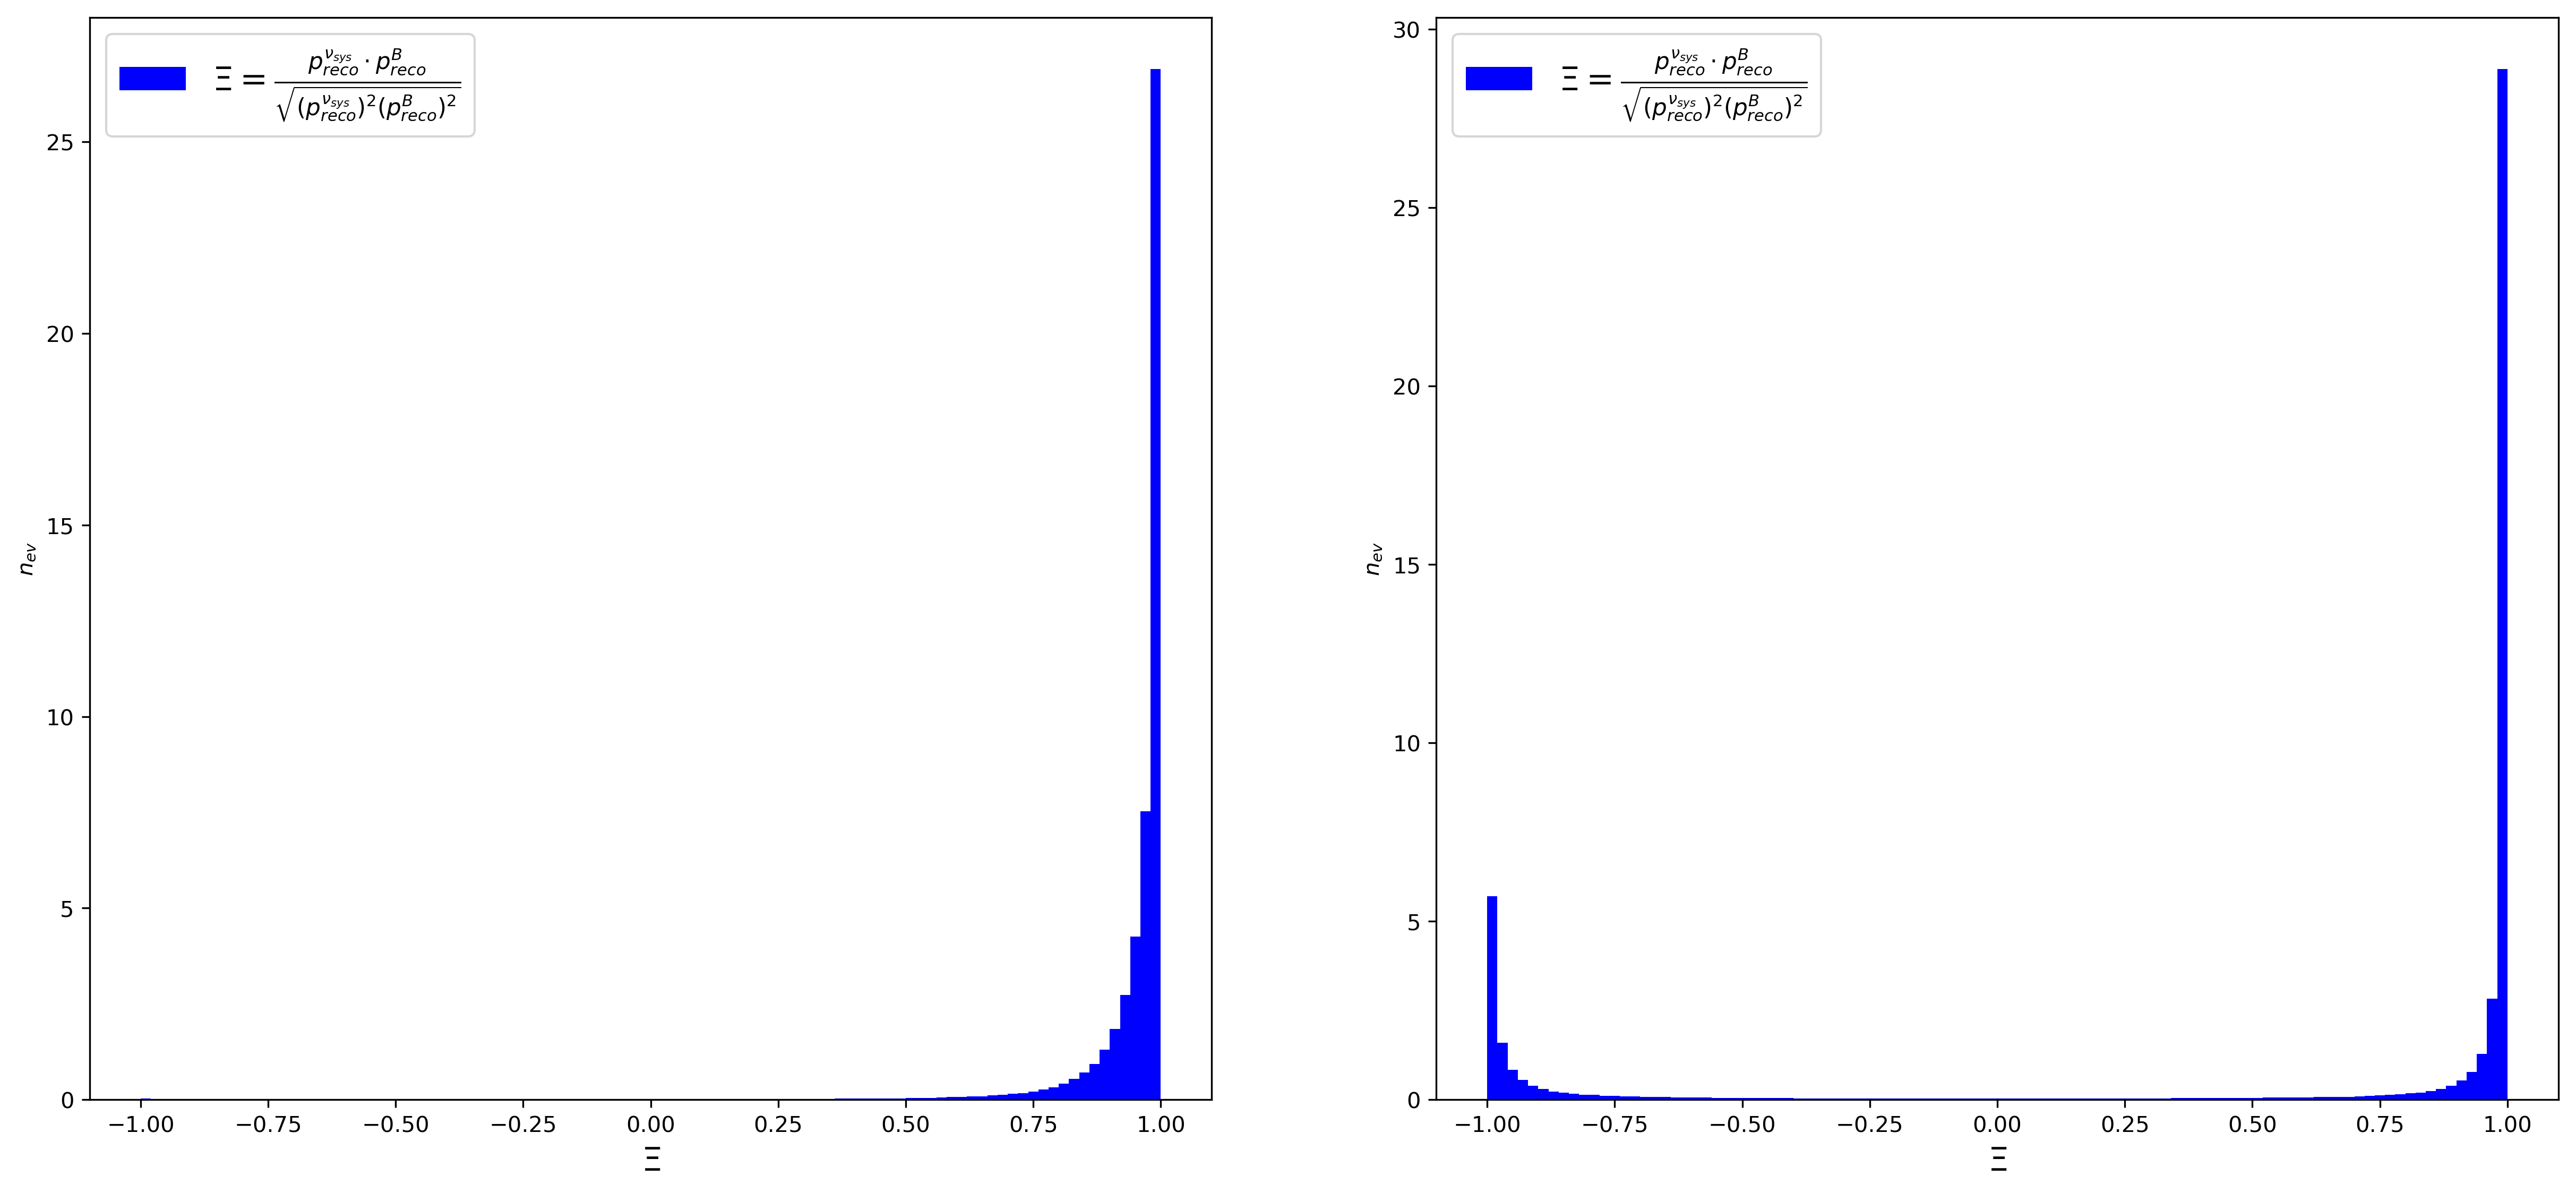

In [13]:
##########
# B RECO #
################################
# NEUTRINO SYSTEM COLLINEARITY #
################################

bins = 100
fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(121)
plt.hist(mu['dot_nusysreco_bcT'], bins=bins, color='b', density=True, label=r'$\Xi = \frac{p^{\nu_{sys}}_{reco} \cdot p^{B}_{reco}}{\sqrt{(p^{\nu_{sys}}_{reco})^2 (p^{B}_{reco})^2}}$')
ax.set_xlabel(r'$\Xi$',fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)
ax = fig.add_subplot(122)
plt.hist(mu['dot_nusysreco_bcZ'], bins=bins, color='b', density=True, label=r'$\Xi = \frac{p^{\nu_{sys}}_{reco} \cdot p^{B}_{reco}}{\sqrt{(p^{\nu_{sys}}_{reco})^2 (p^{B}_{reco})^2}}$')
ax.set_xlabel(r'$\Xi$',fontsize=15)
ax.set_ylabel(r'$n_{ev}$')
ax.legend(fontsize=15)

(0, 2)

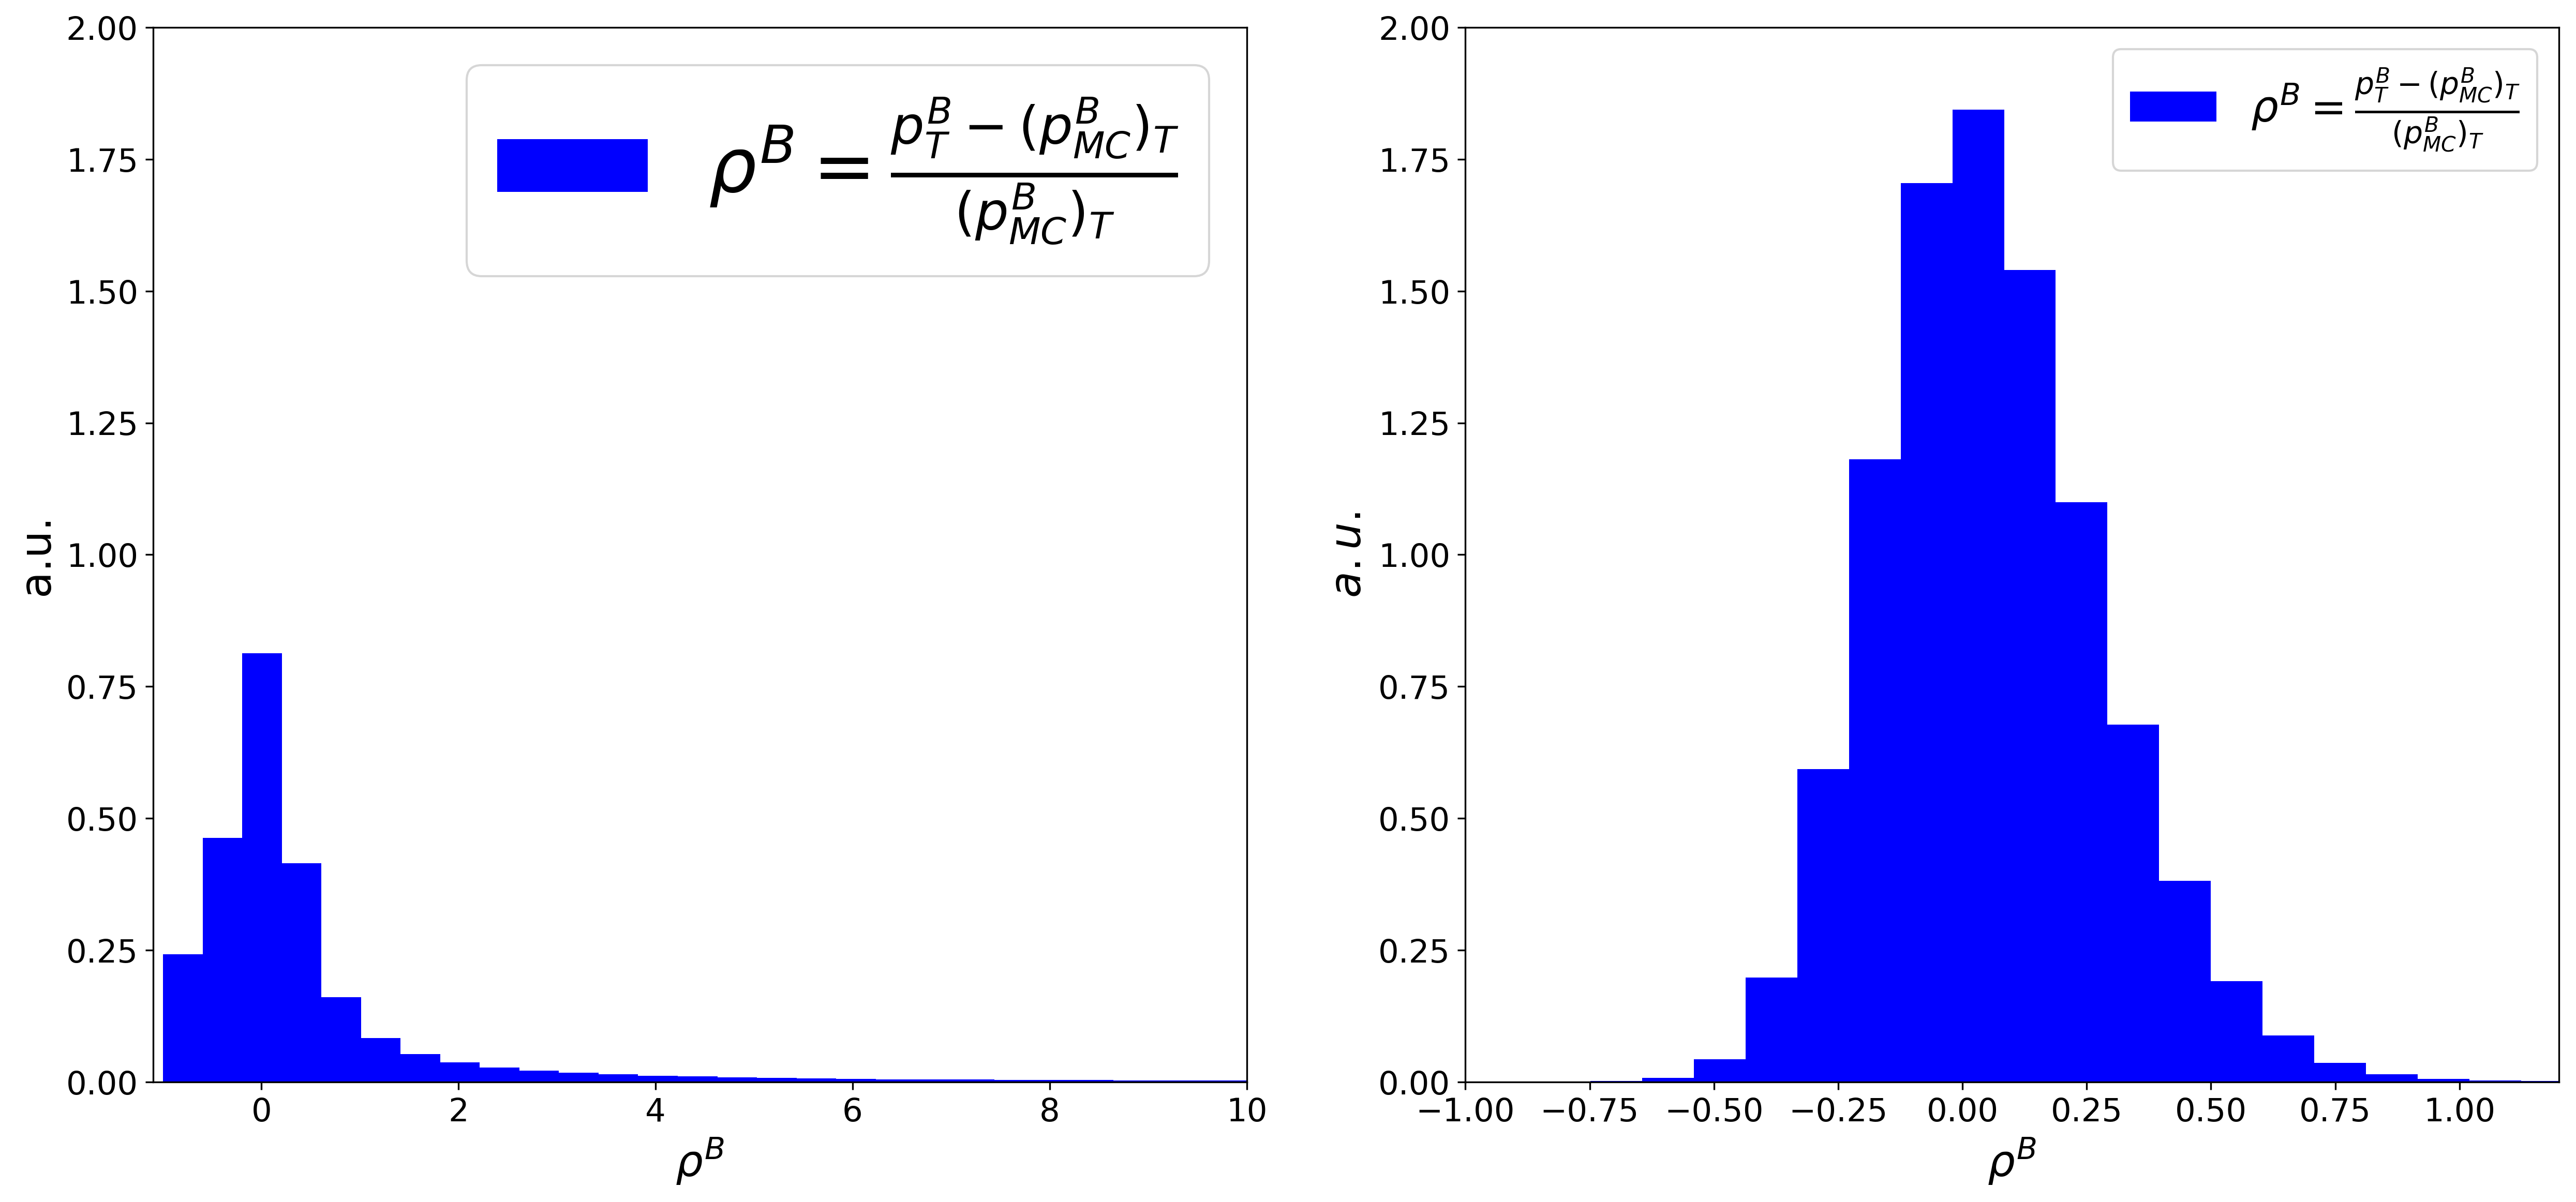

In [12]:
##########
# B RECO #
##############
# Bc pT RECO #
##############

fig = plt.figure(dpi=300)
fig.set_size_inches(20,9)
ax = fig.add_subplot(122)
plt.hist((mu['bcT_pt']-mu['bc_pt'])/mu['bc_pt'], bins=400, color='b', density=True, label=r'$\rho^B = \frac{p_T^B-(p^B_{MC})_T}{(p^B_{MC})_T}$')
ax.set_xlabel(r'$\rho^B$',fontsize=20)
ax.set_ylabel(r'$a.u.$',fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.xlim([-1,1.2])
plt.ylim([0,2])
ax.legend(fontsize=20)
ax = fig.add_subplot(121)
temp = mu[(mu['bcZ_pt']-mu['bc_pt'])/mu['bc_pt'] < 200]
plt.hist((temp['bcZ_pt']-temp['bc_pt'])/temp['bc_pt'], bins=500, color='b', density=True, label=r'$\rho^B = \frac{p_T^B-(p^B_{MC})_T}{(p^B_{MC})_T}$')
ax.set_xlabel(r'$\rho^B$',fontsize=20)
ax.set_ylabel(r'a.u.',fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
ax.legend(fontsize=35)
plt.xlim([-1.1,10])
plt.ylim([0,2])